# Surprise Housing Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The ask is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

#### Index<a id='index'></a>
- [Data Understanding and Exploration](#dataUnderstandingSection).
- [Data Cleaning](#dataCleaning)
- [Data Preparation](#dataPreparation)
- [Model Building](#modelBuilding)
- [Model Evaluation](#modelEvaluation)
- [Steps for Question Answers segment II](#segment_2)


In [1]:
# Import the necessary library for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import modelling helpers
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the columns that can be displayed to max as 100 and rows to 200
pd.set_option('display.max_columns', 310)
pd.options.display.max_rows = 310

# Setting formatting on the decimal values so that the coefficients are easy to read
pd.options.display.float_format = "{:,.6f}".format

### Data Understanding and Exploration<a id='dataUnderstandingSection'></a>
Go to [Index](#index).

In [2]:
# reading the dataset in datafrae
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL    65.000000     8450   Pave   NaN      Reg   
1   2          20       RL    80.000000     9600   Pave   NaN      Reg   
2   3          60       RL    68.000000    11250   Pave   NaN      IR1   
3   4          70       RL    60.000000     9550   Pave   NaN      IR1   
4   5          60       RL    84.000000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0  196.000000        Gd        TA      PConc       Gd       TA           No   
1    0.000000        TA        TA     CBlock       Gd       TA           Gd   
2  162.000000        Gd        TA      PConc       Gd       TA           Mn   
3    0.000000        TA        TA     BrkTil       TA       Gd           No   
4  350.000000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# Check the shape of the dataset
df.shape

(1460, 81)

#### 1460 rows and 81 columns in the dataset

In [4]:
#Check the null values and datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### From the data dictionary and the column type observation, we find that the column Id should be of type object instead of integer

In [5]:
# Check the numerical columns and its stats
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count 1,460.000000 1,460.000000 1,201.000000   1,460.000000 1,460.000000   
mean    730.500000    56.897260    70.049958  10,516.828082     6.099315   
std     421.610009    42.300571    24.284752   9,981.264932     1.382997   
min       1.000000    20.000000    21.000000   1,300.000000     1.000000   
25%     365.750000    20.000000    59.000000   7,553.500000     5.000000   
50%     730.500000    50.000000    69.000000   9,478.500000     6.000000   
75%   1,095.250000    70.000000    80.000000  11,601.500000     7.000000   
max   1,460.000000   190.000000   313.000000 215,245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count 1,460.000000 1,460.000000  1,460.000000 1,452.000000 1,460.000000   
mean      5.575342 1,971.267808  1,984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000 1,872.000000  1,950.000000     0.000000     0.000000   
25%       5.000000 1,954.000000  1,967.000000     0.000000     0.000000   
50%       5.000000 1,973.000000  1,994.000000     0.000000   383.500000   
75%       6.000000 2,000.000000  2,004.000000   166.000000   712.250000   
max       9.000000 2,010.000000  2,010.000000 1,600.000000 5,644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count 1,460.000000 1,460.000000 1,460.000000 1,460.000000 1,460.000000   
mean     46.549315   567.240411 1,057.429452 1,162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000 1,087.000000     0.000000   
75%       0.000000   808.000000 1,298.250000 1,391.250000   728.000000   
max   1,474.000000 2,336.000000 6,110.000000 4,692.000000 2,065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1,460.000000 1,460.000000  1,460.000000  1,460.000000 1,460.000000   
mean       5.844521 1,515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000 1,129.500000      0.000000      0.000000     1.000000   
50%        0.000000 1,464.000000      0.000000      0.000000     2.000000   
75%        0.000000 1,776.750000      1.000000      0.000000     2.000000   
max      572.000000 5,642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count 1,460.000000  1,460.000000  1,460.000000  1,460.000000 1,460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count 1,379.000000 1,460.000000 1,460.000000 1,460.000000 1,460.000000   
mean  1,978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min   1,900.000000     0.000000     0.000000     0.000000     0.000000   
25%   1,961.000000     1.000000   334.500000     0.000000     0.000000   
50%   1,980.000000     2.000000   480.000000     0.000000    25.000000   
75%   2,002.000000     2.000000   576.000000   168.000000    68.000000   
max   2,

#### The following observations can be made
- The Id,MS SubClass,OverallQual, OverallCond, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, MoSold  columns need not be counted as a numerical columns as they are not meant for any numerical or statistical analysis. Rather they should be considered as categorical values.
- The year columns can be converted to find the years since (age) instead of using by itself. For example - YearBuilt, YearRemodAdd, YrSold, GarageYrBlt
- A lot of columns have highly skewed data which is evident from the difference between the min, max and mean value. Also observed from the quantile values. We shall observe them by data visualization and perform outlier handling where applicable.

In [6]:
# Checking for % missing values in dataset in descending order
round((df.isna().sum()/len(df.index)*100),2).sort_values(ascending=False)

PoolQC          99.520000
MiscFeature     96.300000
Alley           93.770000
Fence           80.750000
FireplaceQu     47.260000
LotFrontage     17.740000
GarageCond       5.550000
GarageType       5.550000
GarageYrBlt      5.550000
GarageFinish     5.550000
GarageQual       5.550000
BsmtExposure     2.600000
BsmtFinType2     2.600000
BsmtFinType1     2.530000
BsmtCond         2.530000
BsmtQual         2.530000
MasVnrArea       0.550000
MasVnrType       0.550000
Electrical       0.070000
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
LotConfig        0.000000
OverallCond      0.000000
OverallQual      0.000000
HouseStyle       0.000000
BldgType         0.000000
Condition2       0.000000
BsmtFinSF1       0.000000
MSZoning         0.000000
LotArea     

#### As per the data dictionary, the NA values in the following columns are not really null values, but they mean None OR that feature is not available
Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

### Data Cleaning<a id='dataCleaning'></a>
Go to [Index](#index).

#### Categorical columns

In [7]:
# Updating null values to None as per data dictionary for the observed columns

L=['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for col in L:
    df[col].fillna('None', inplace=True)

In [8]:
# Converting non-numerical columns observed during exploration to categorical columns
L=['Id','MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold']
for col in L:
    df[col]=df[col].astype('object')

In [9]:
categoricalCols=list(df.select_dtypes(include=['object']).columns)
categoricalCols.remove('Id')
#categoricalCols

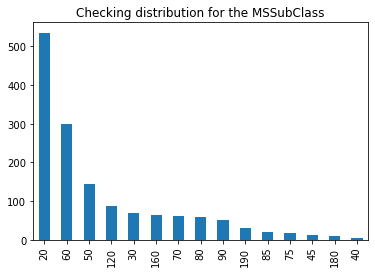

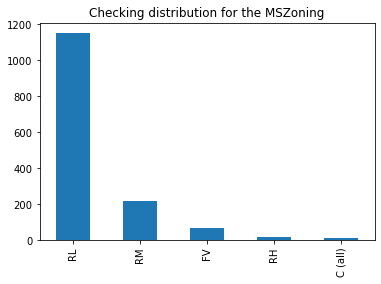

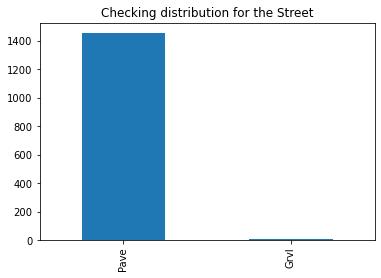

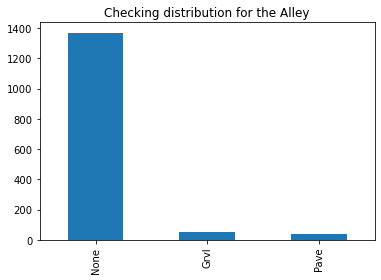

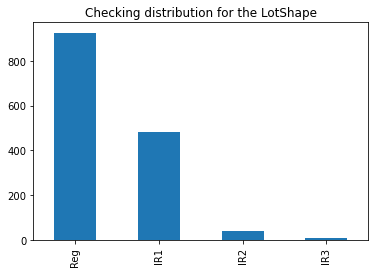

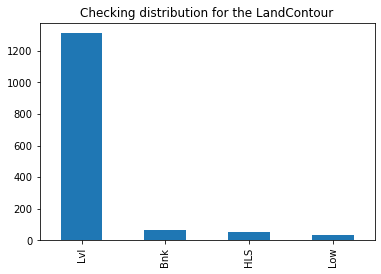

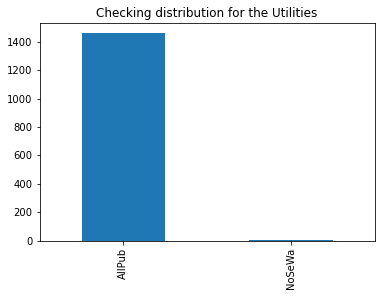

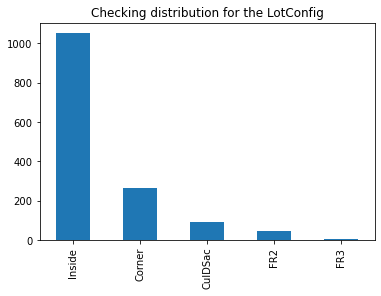

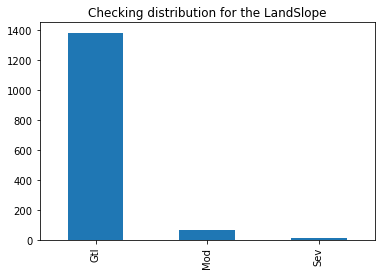

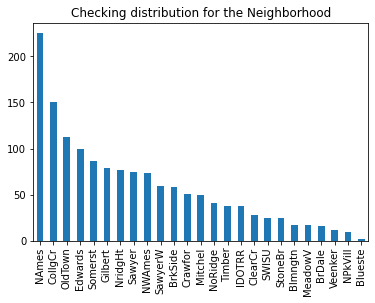

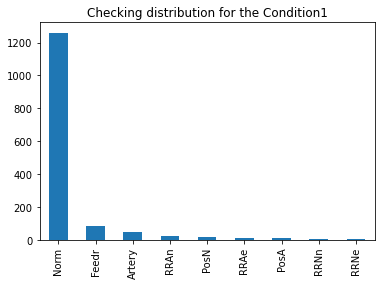

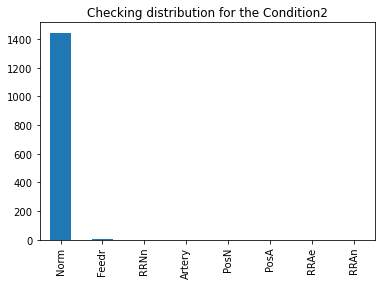

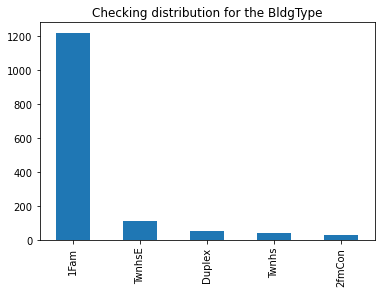

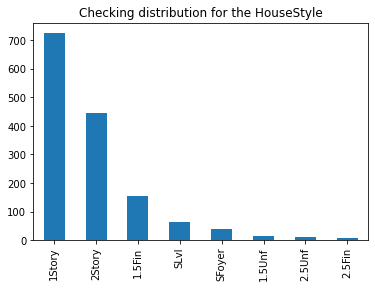

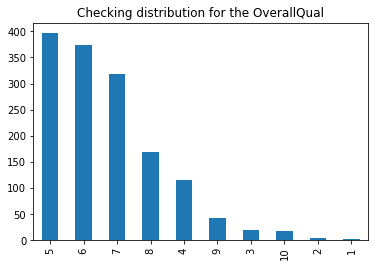

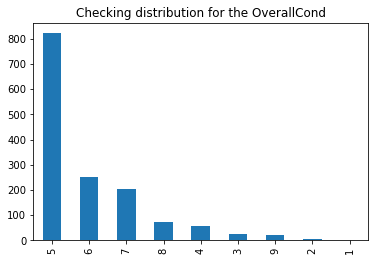

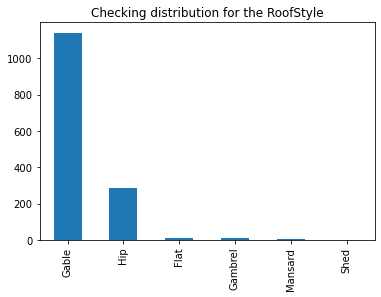

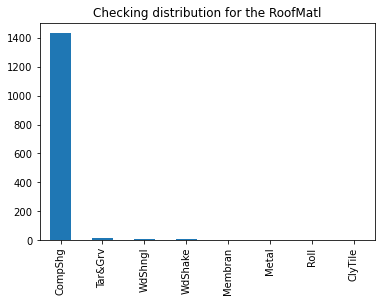

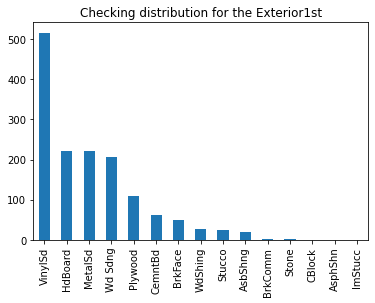

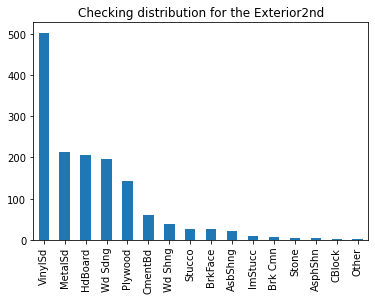

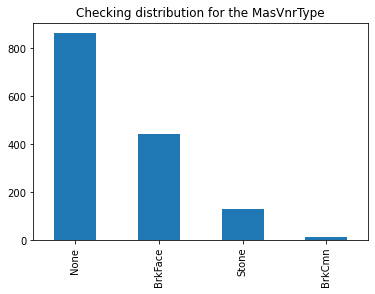

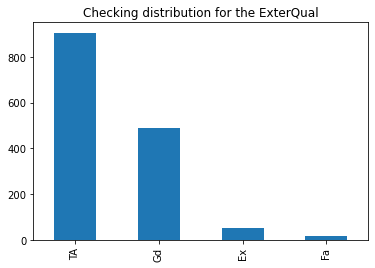

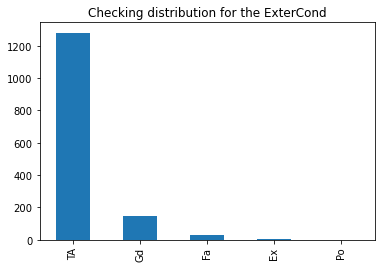

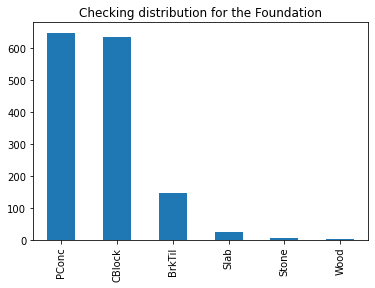

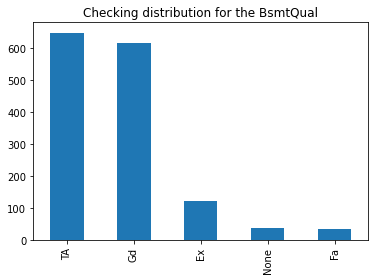

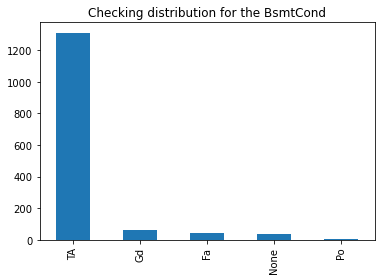

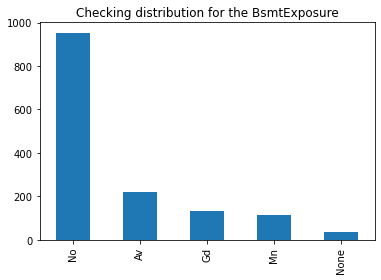

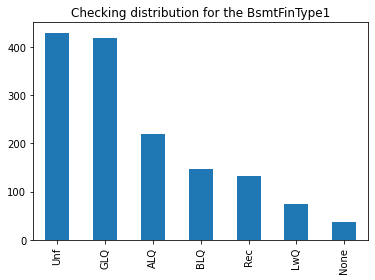

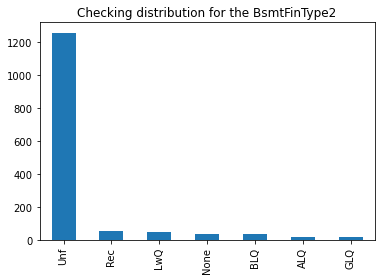

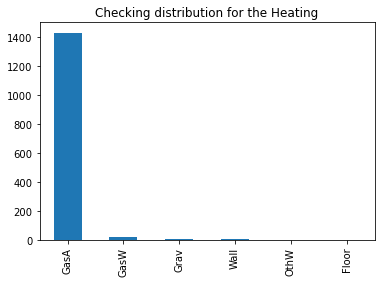

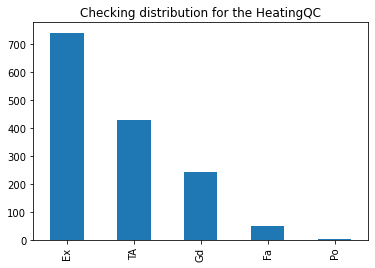

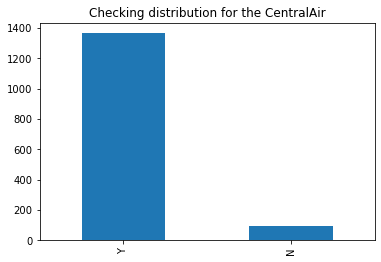

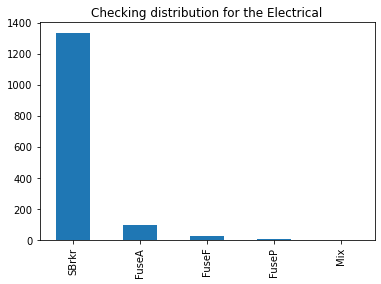

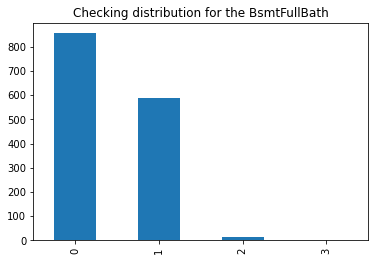

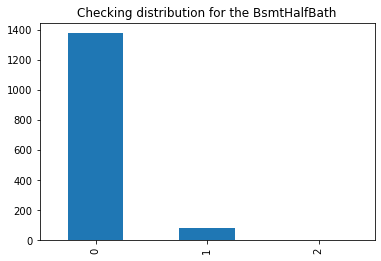

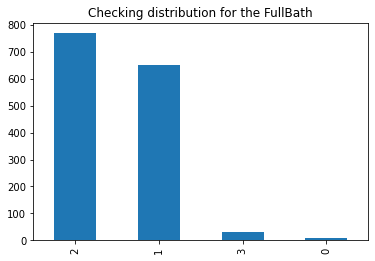

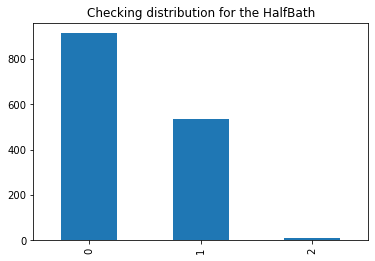

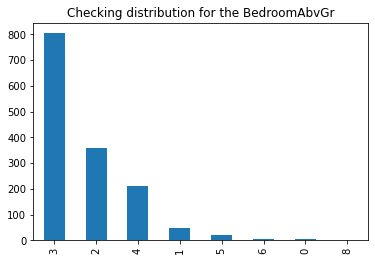

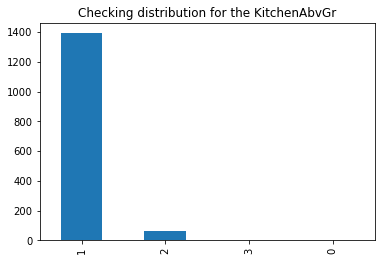

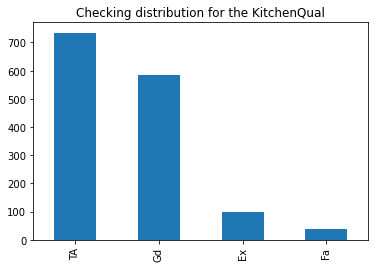

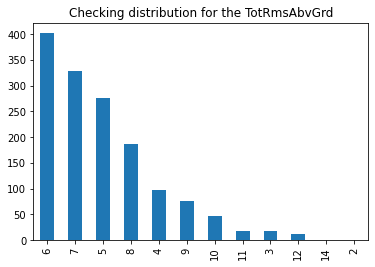

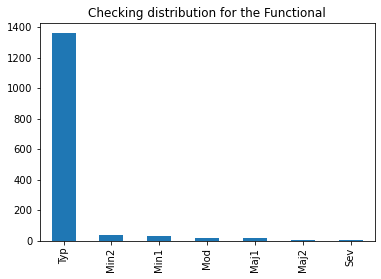

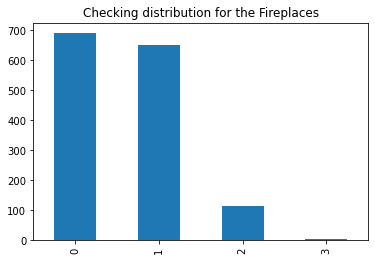

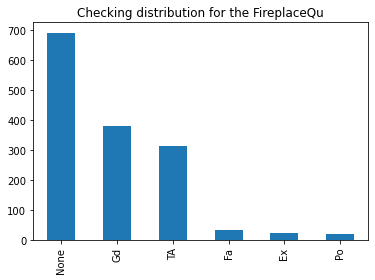

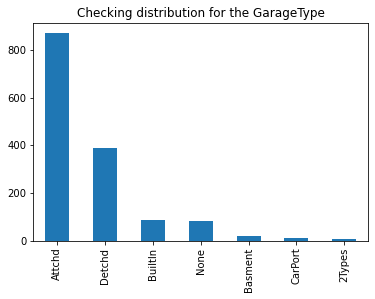

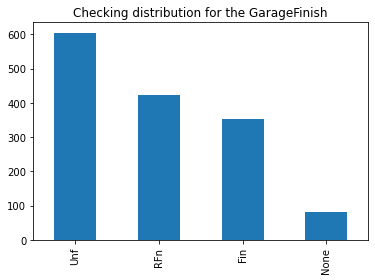

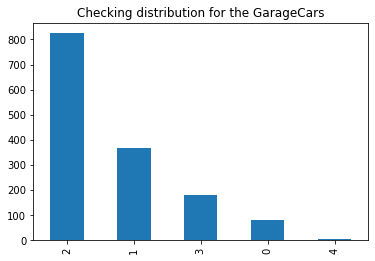

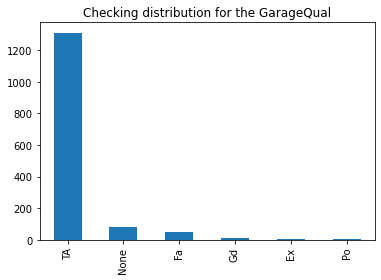

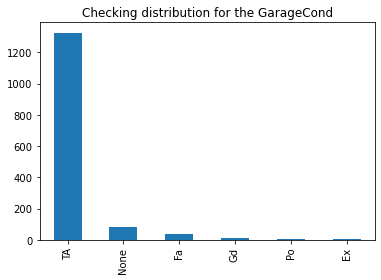

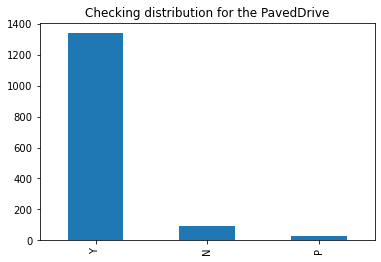

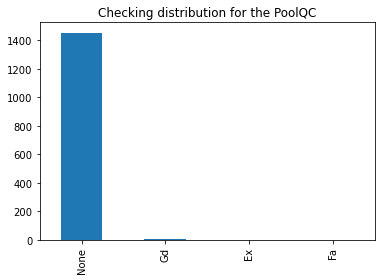

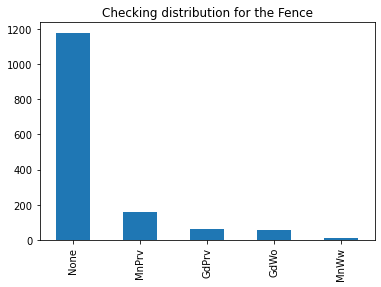

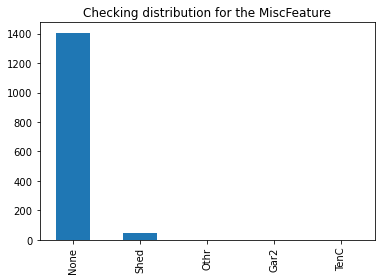

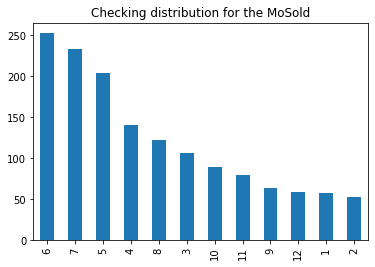

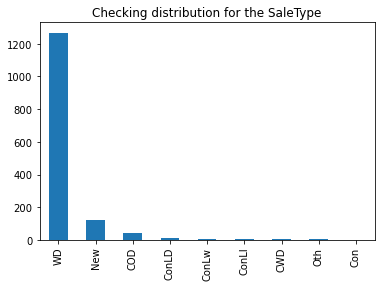

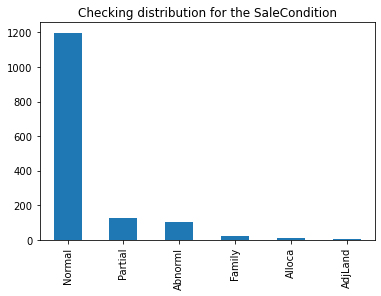

In [10]:
#Checking value counts visually
for col in categoricalCols:
    plt.title("Checking distribution for the "+ col)
    df[col].value_counts().plot.bar()
    plt.show();

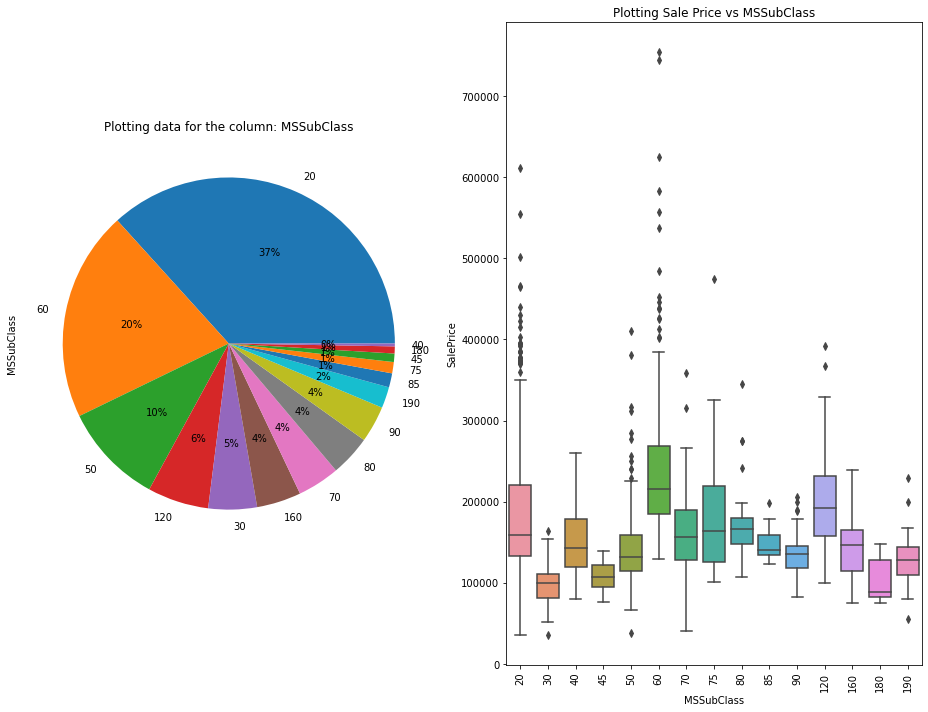

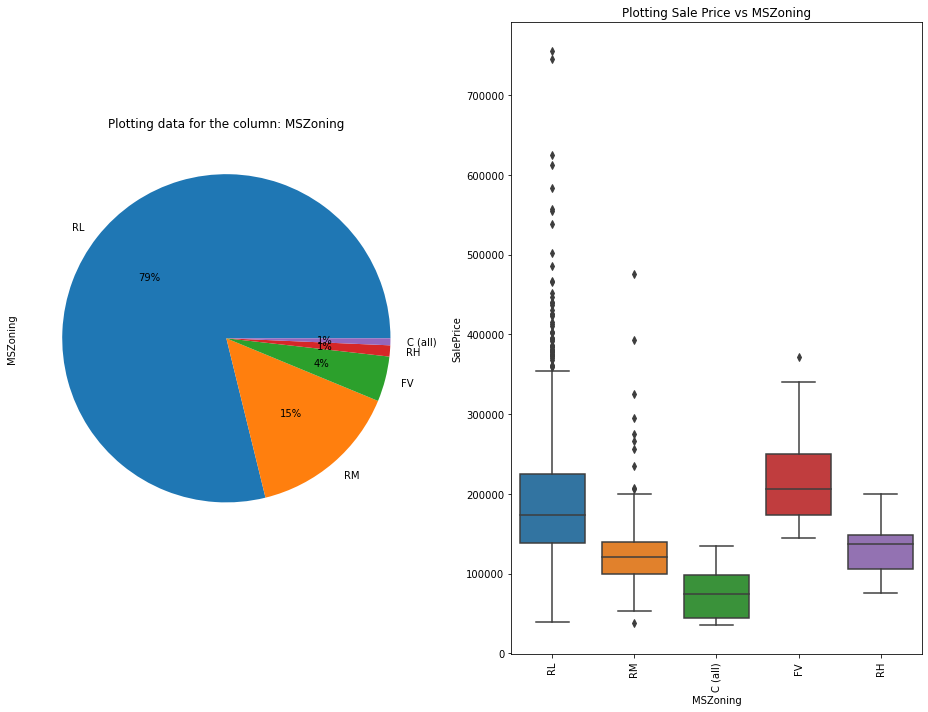

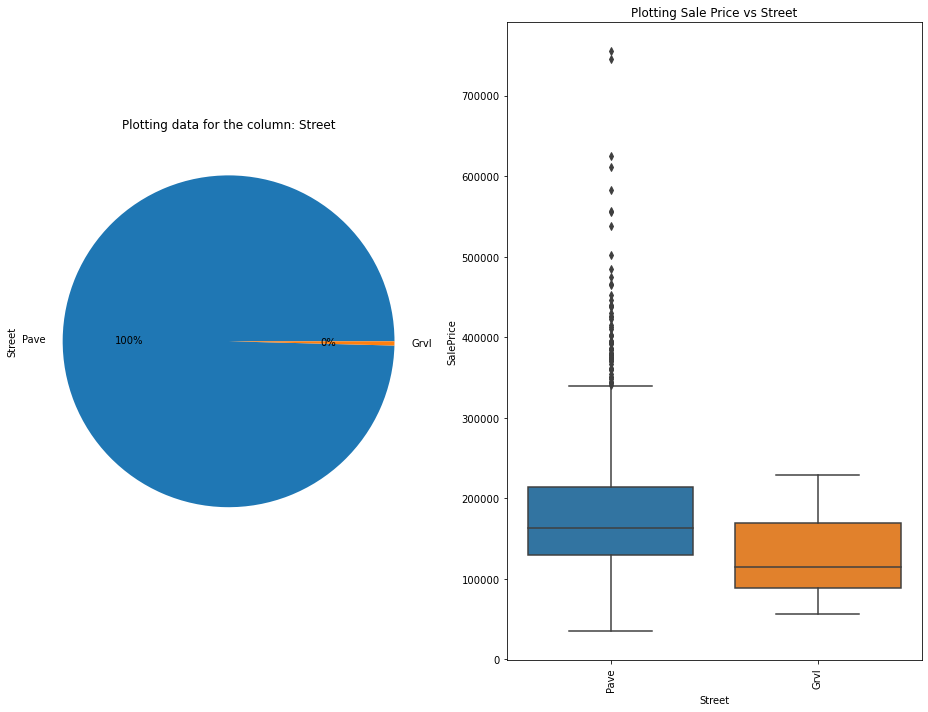

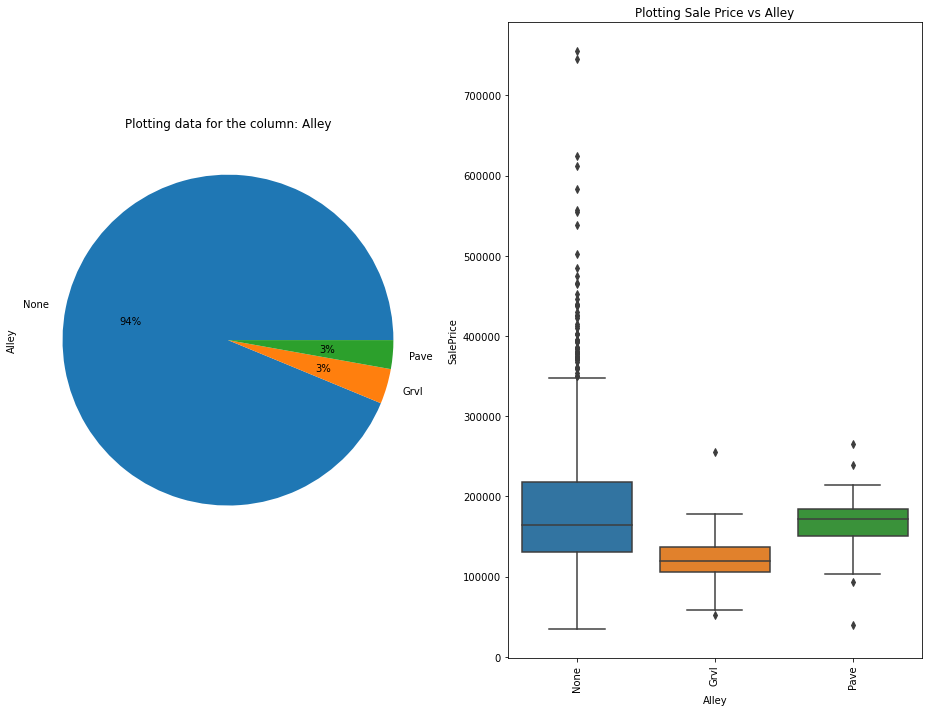

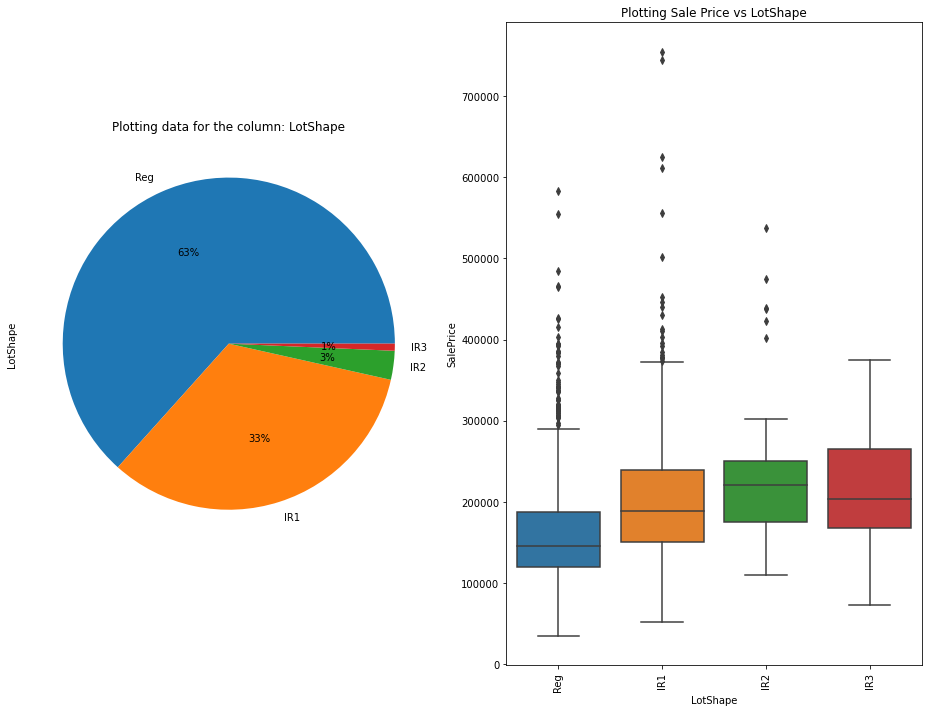

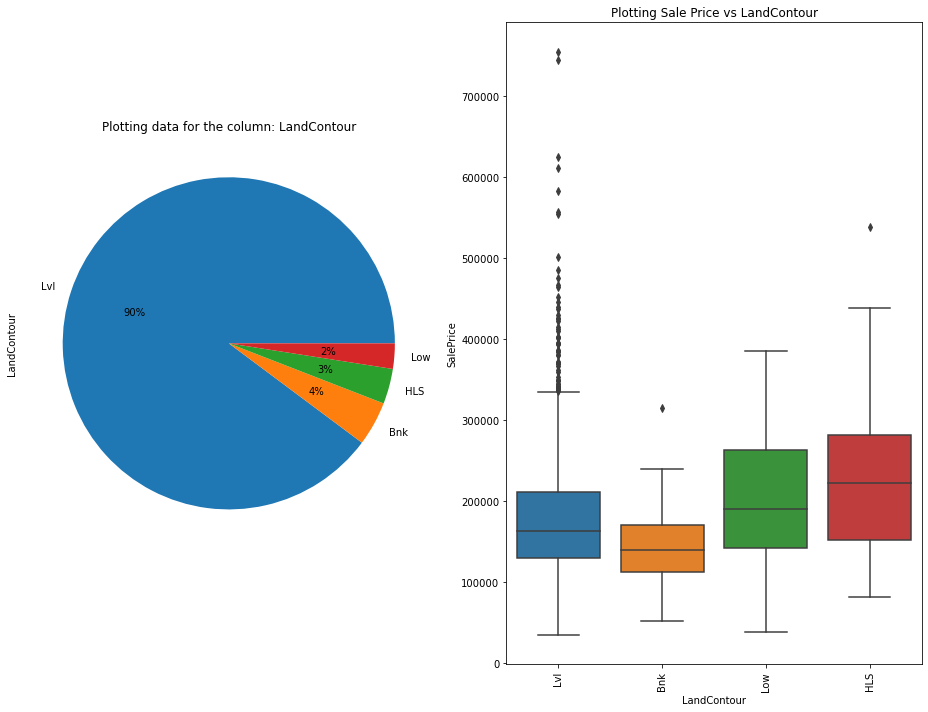

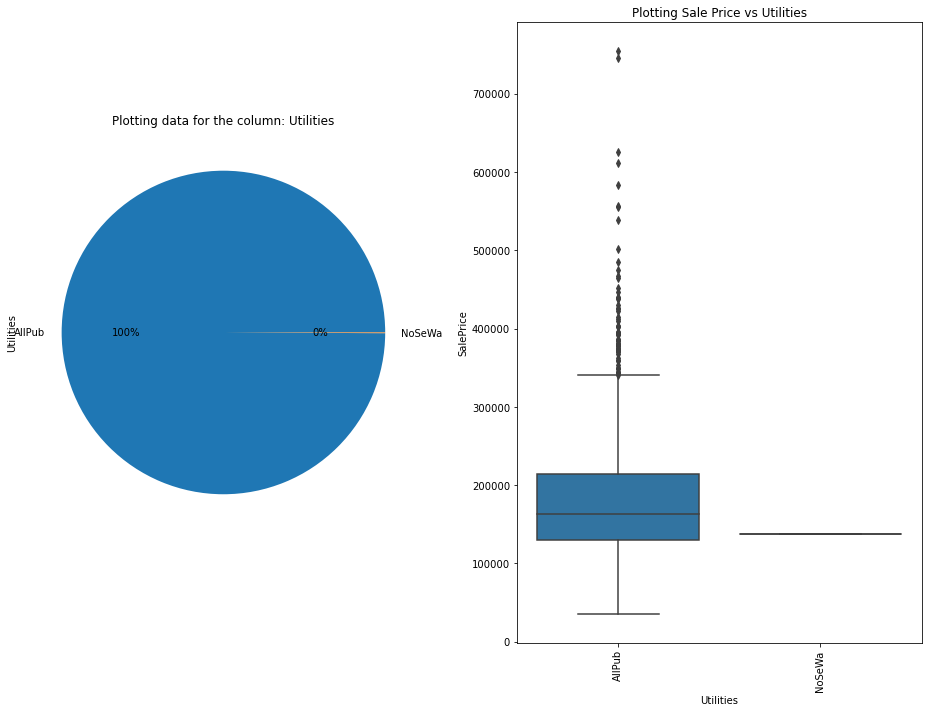

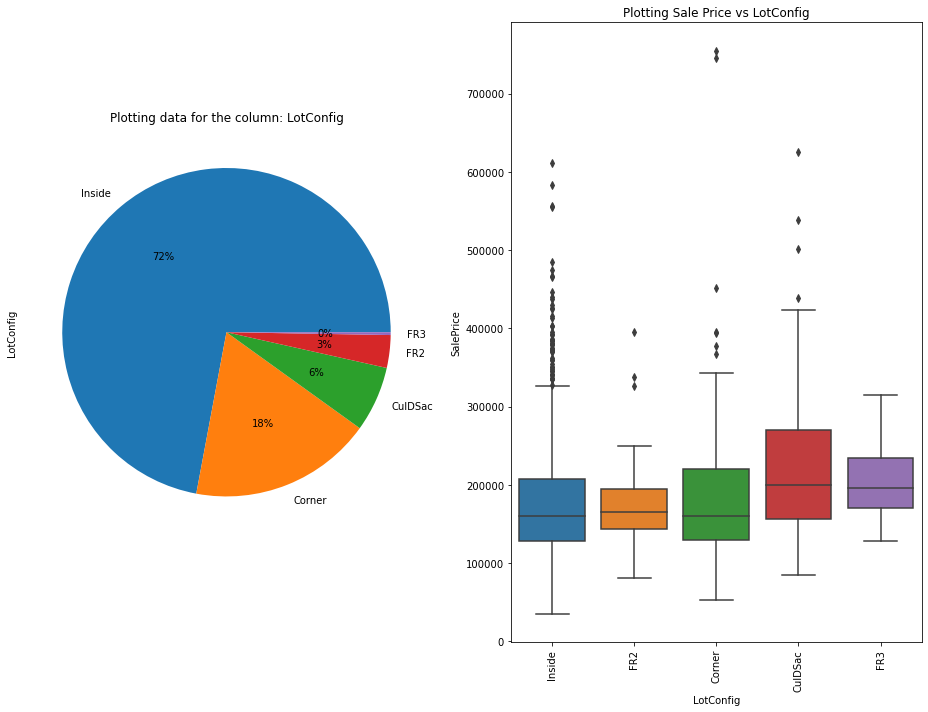

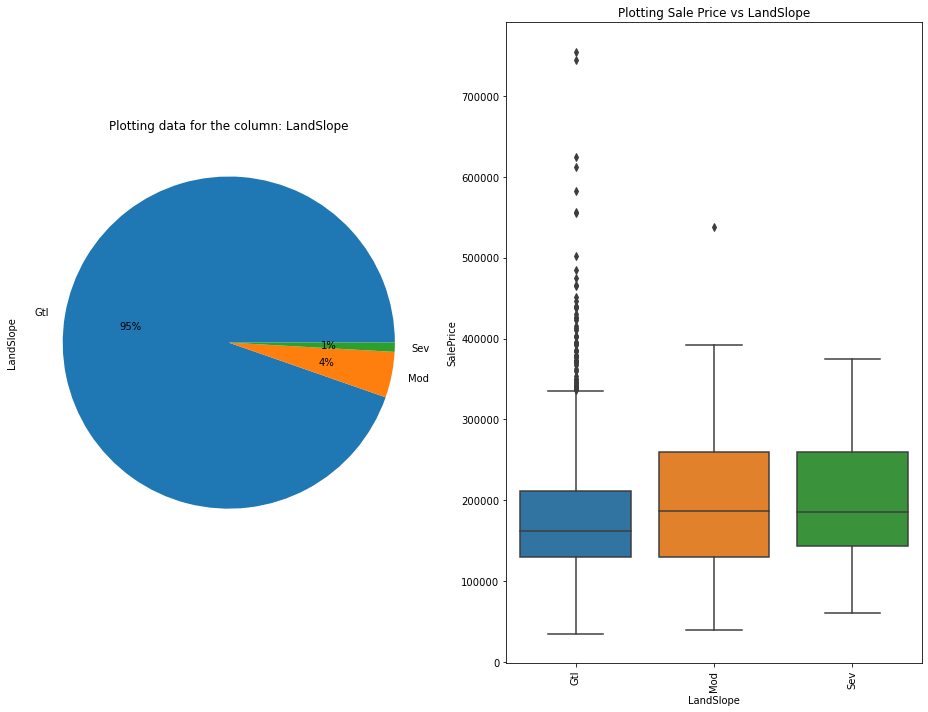

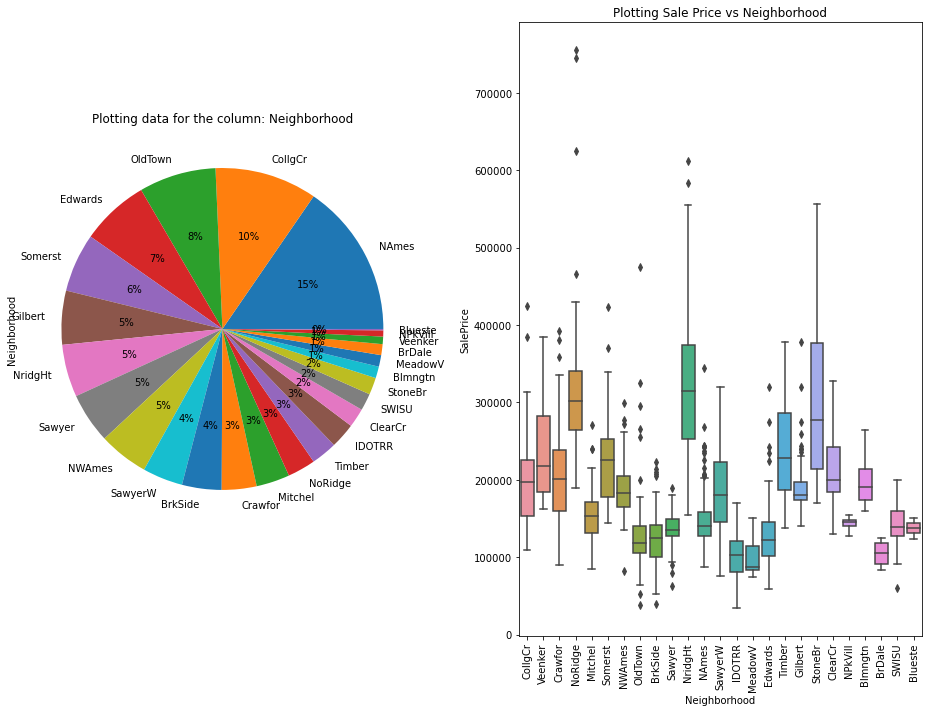

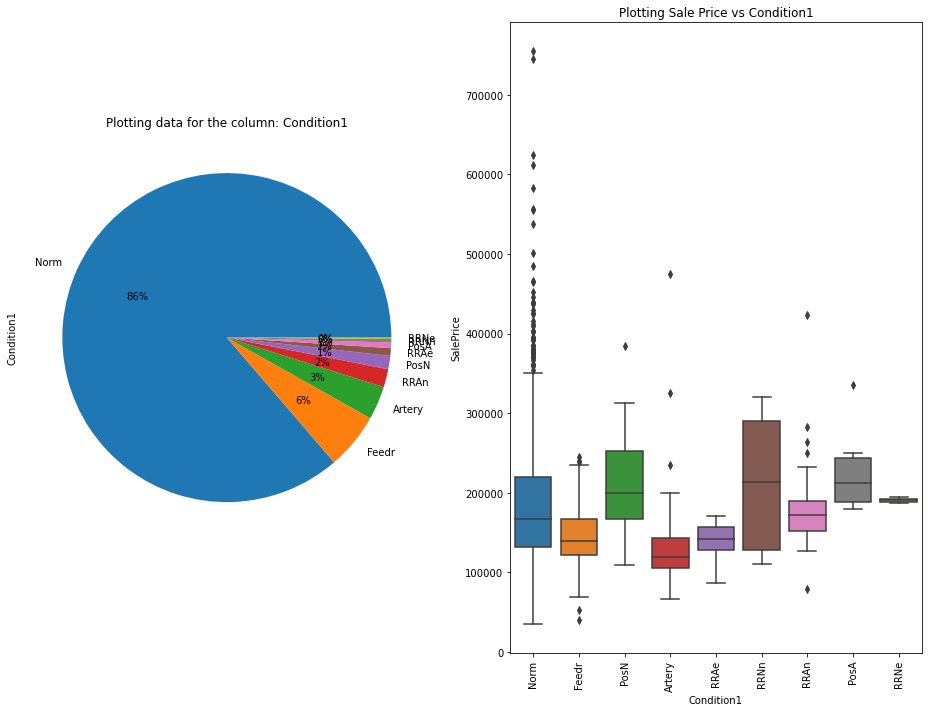

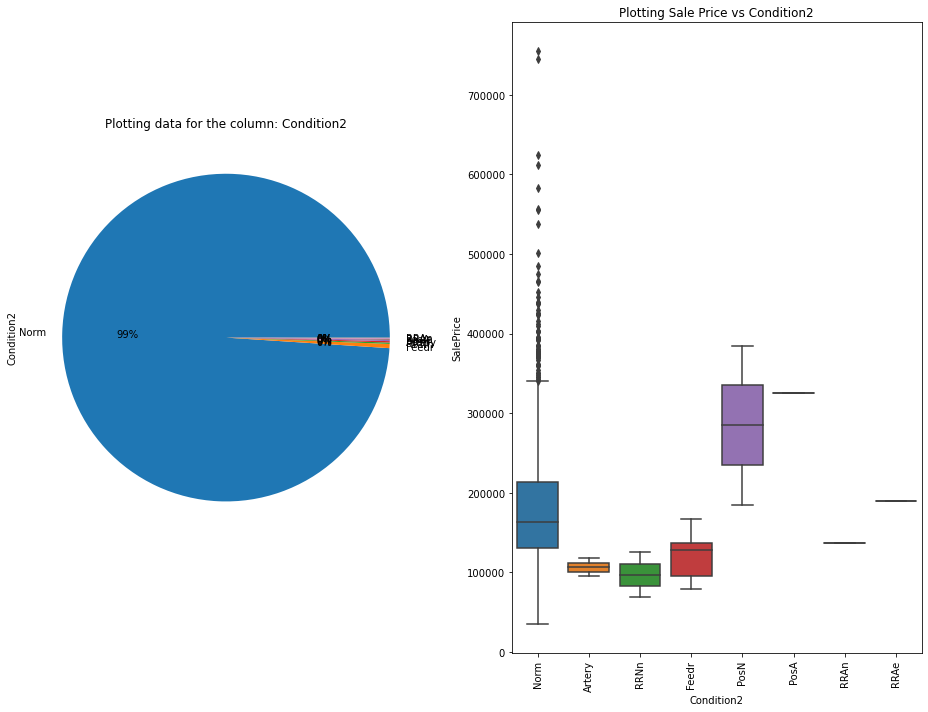

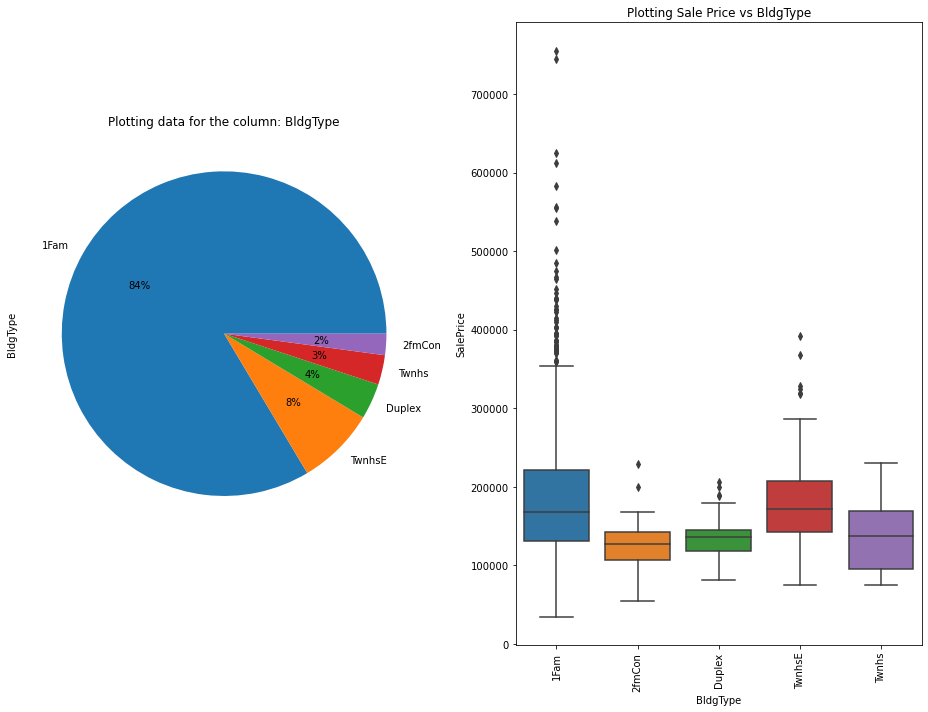

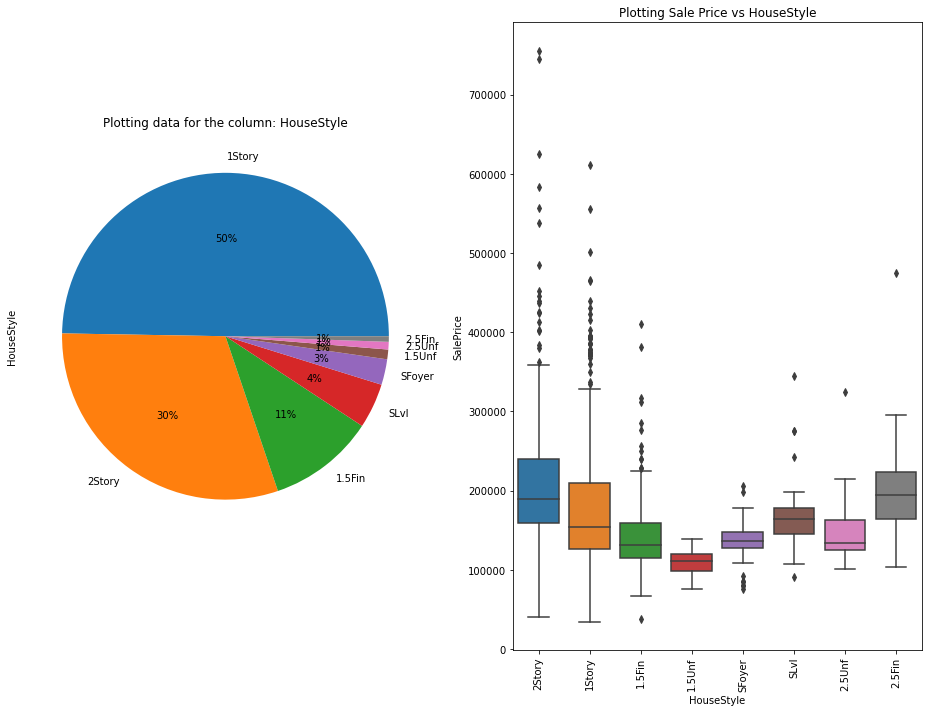

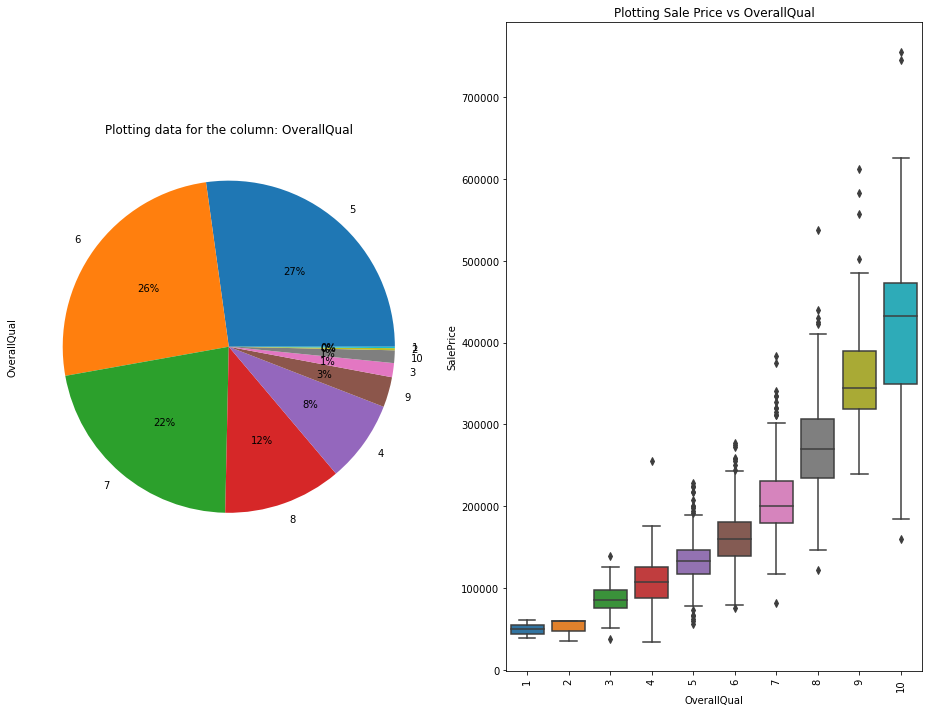

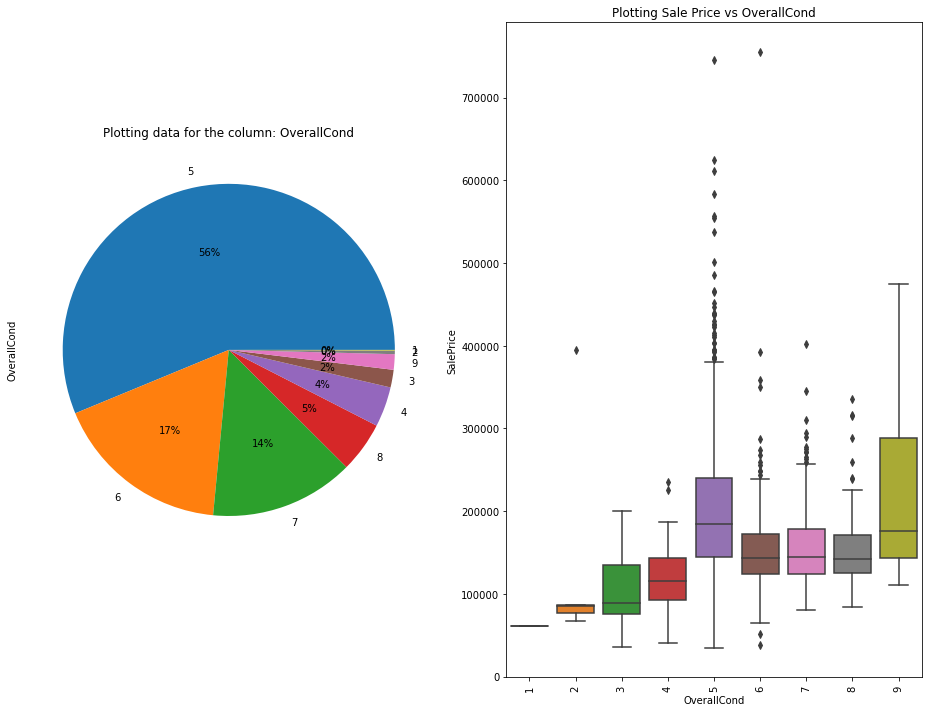

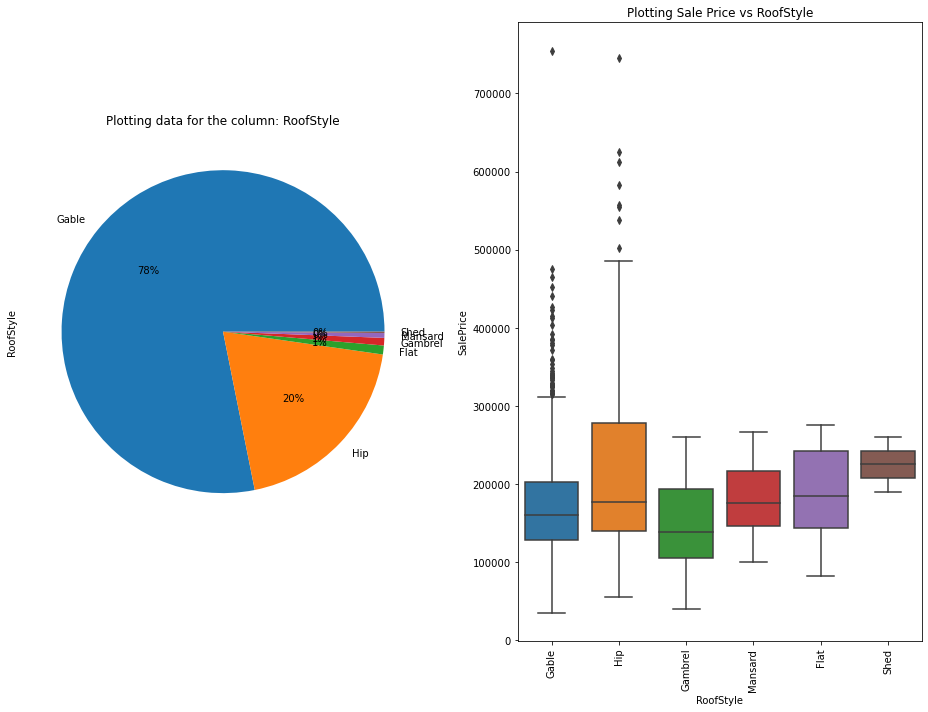

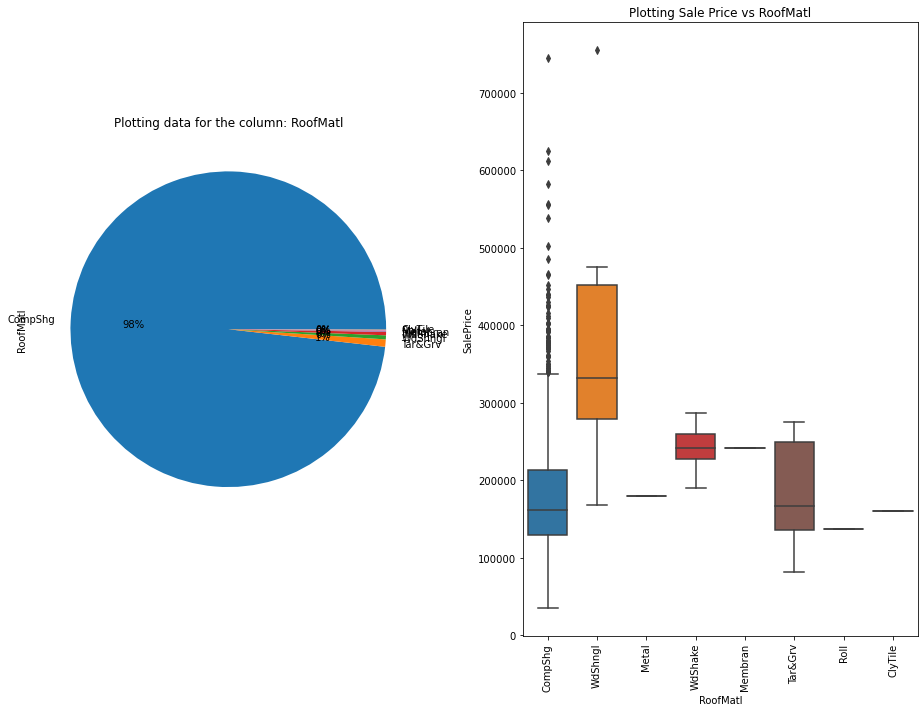

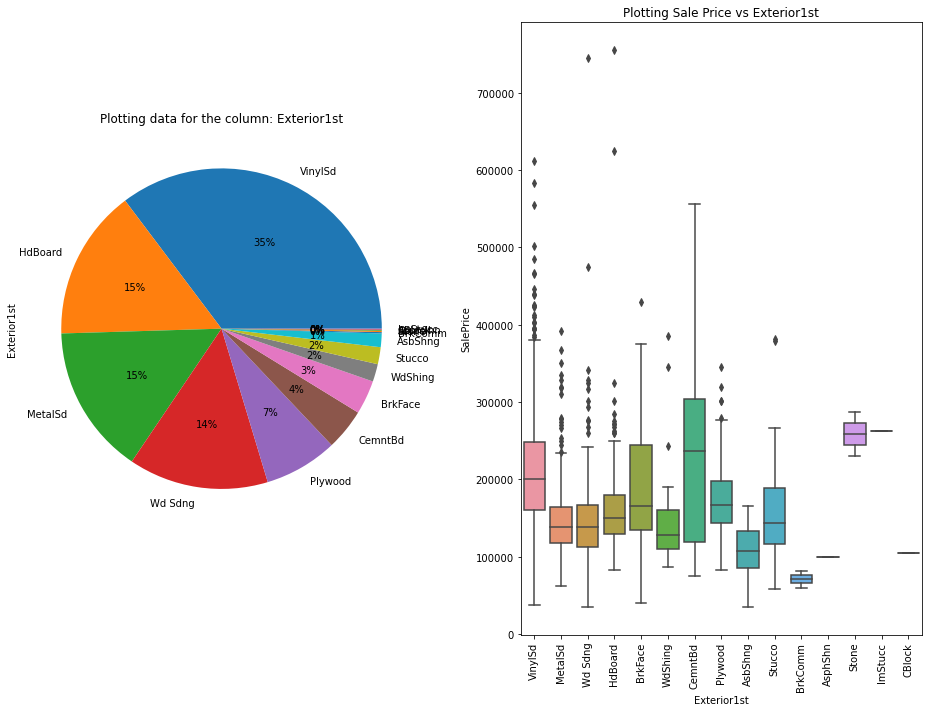

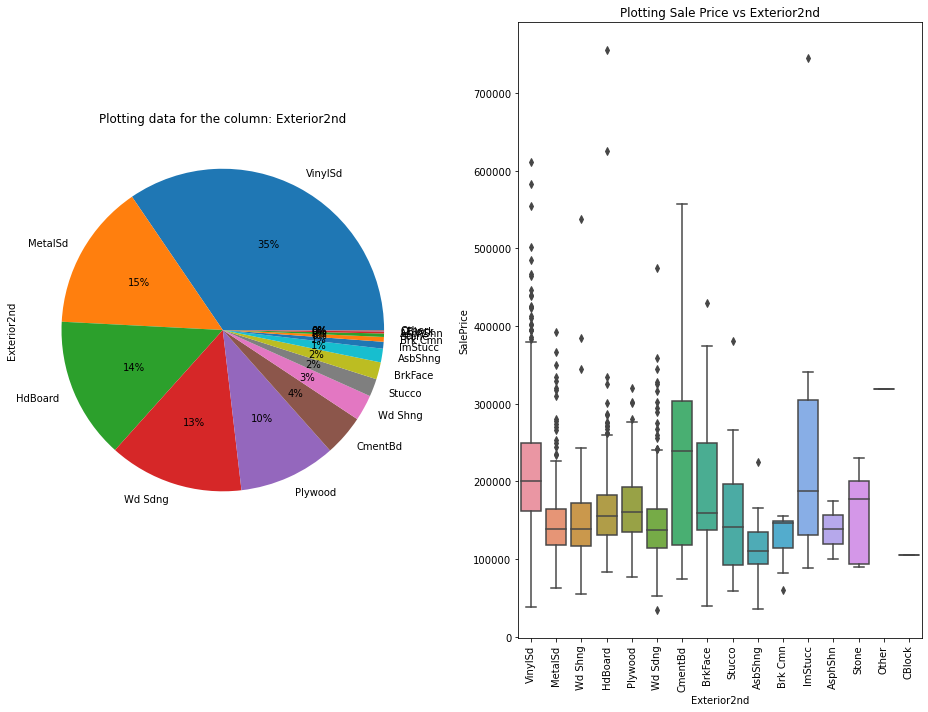

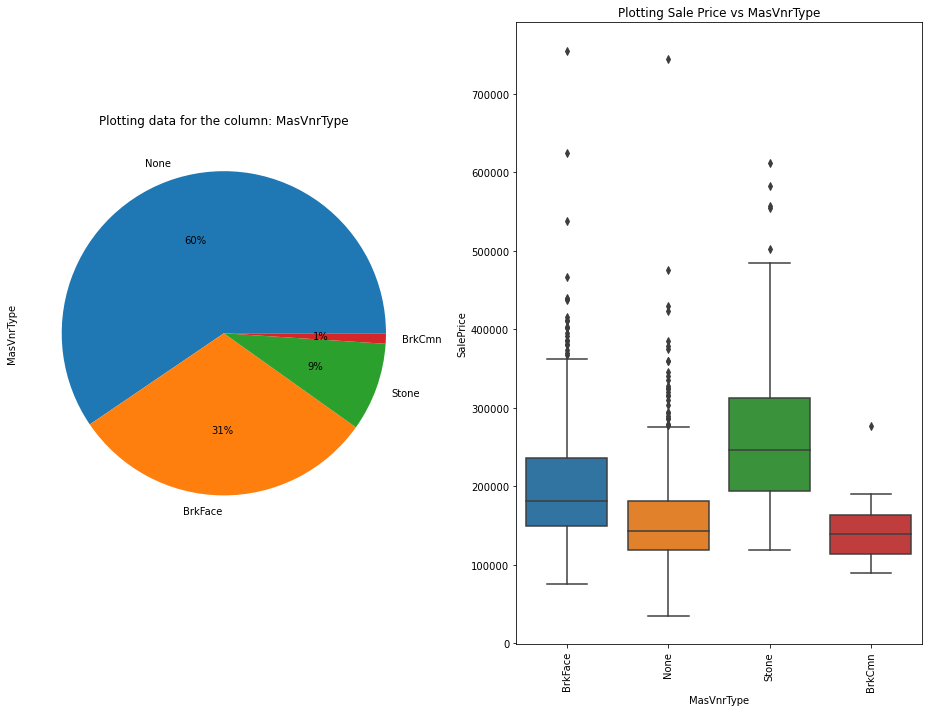

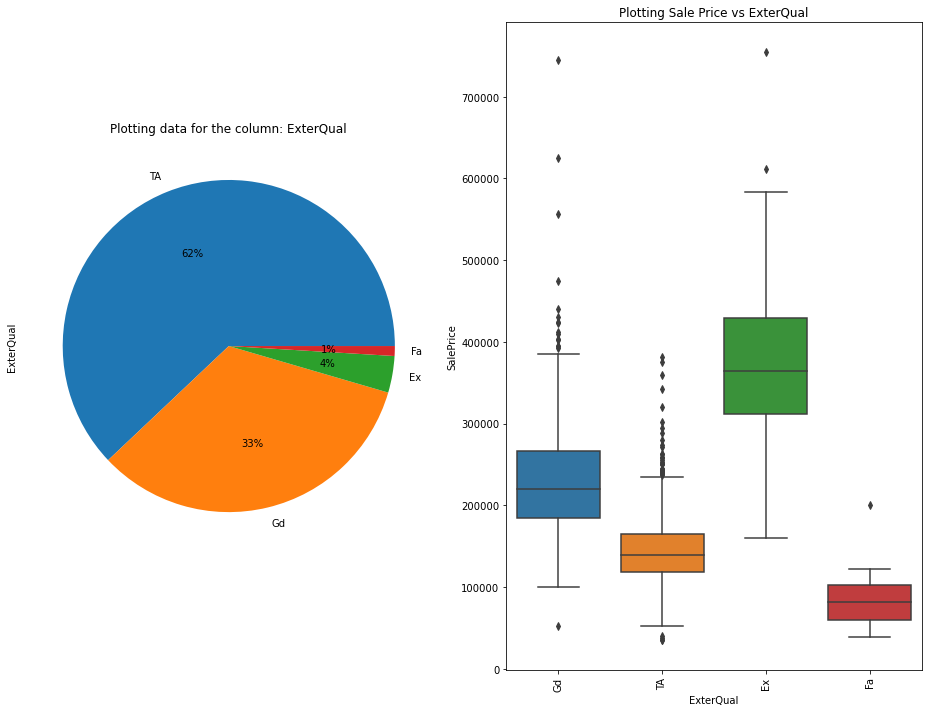

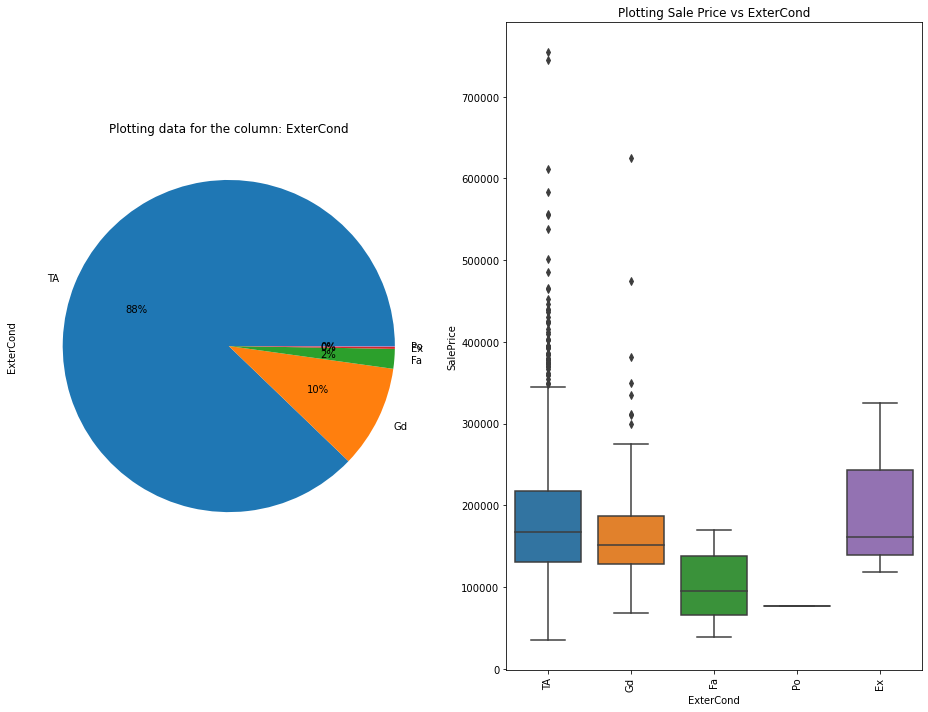

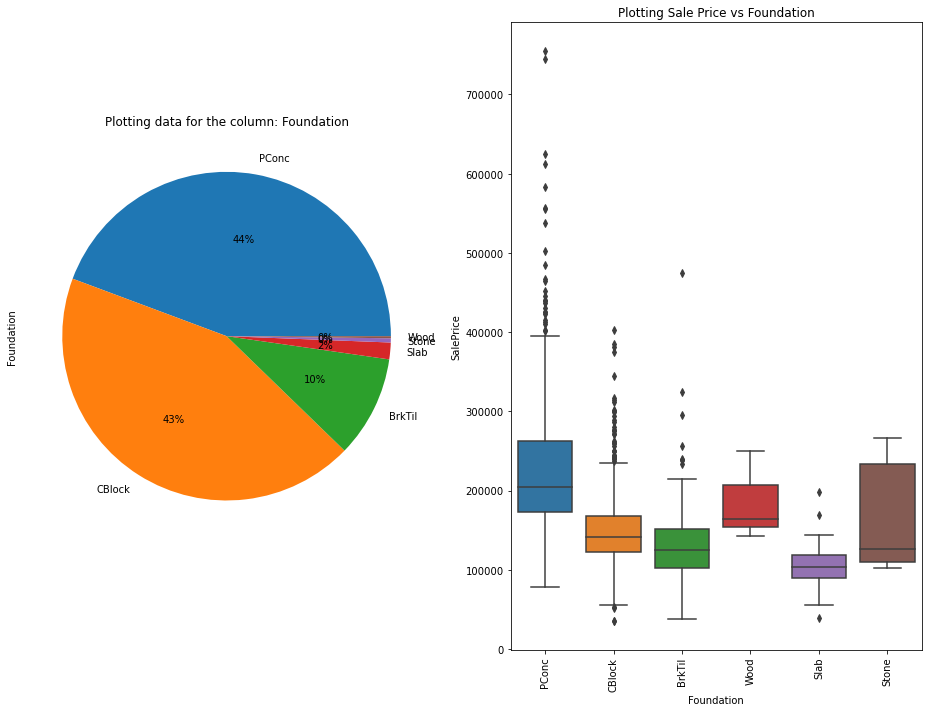

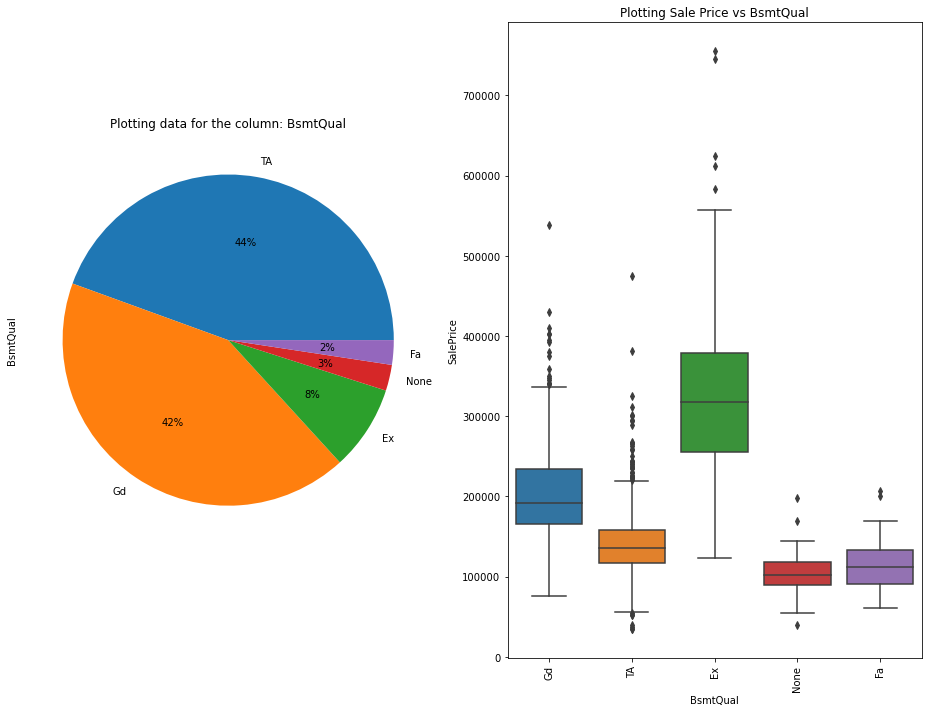

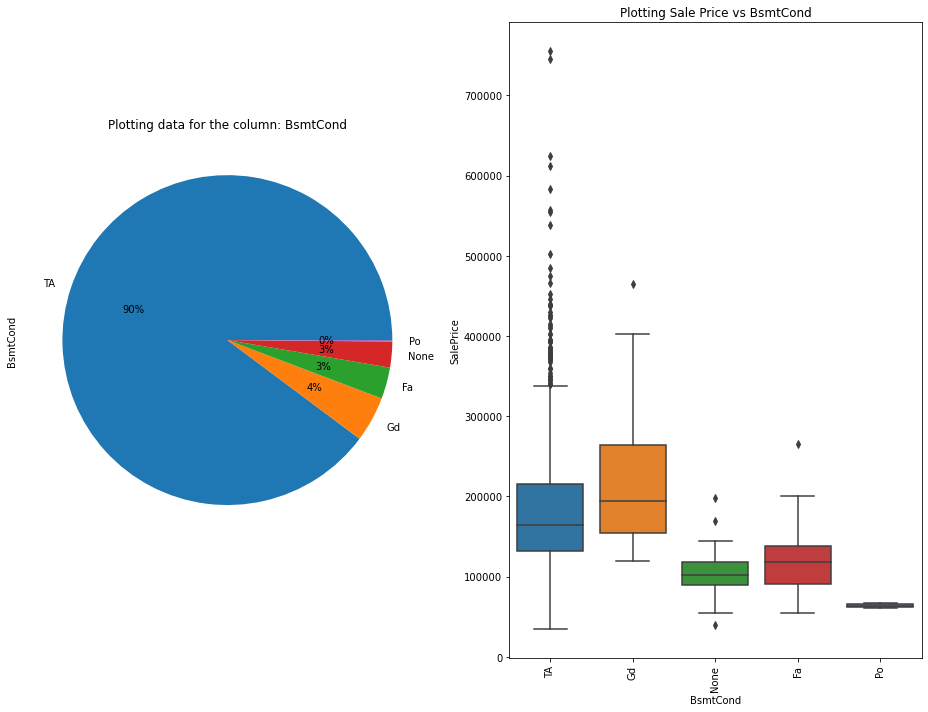

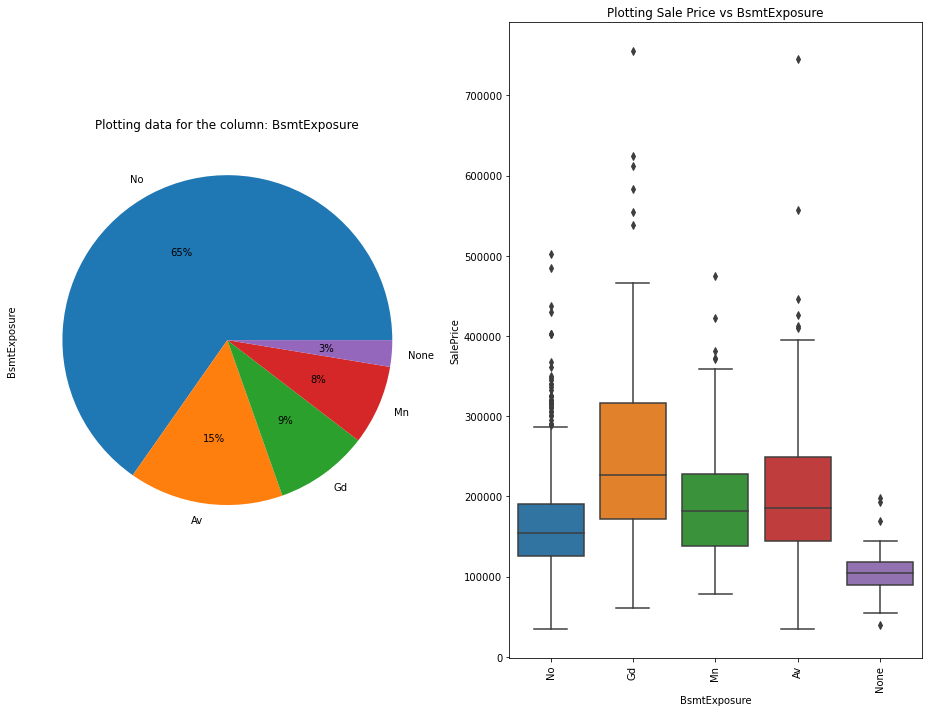

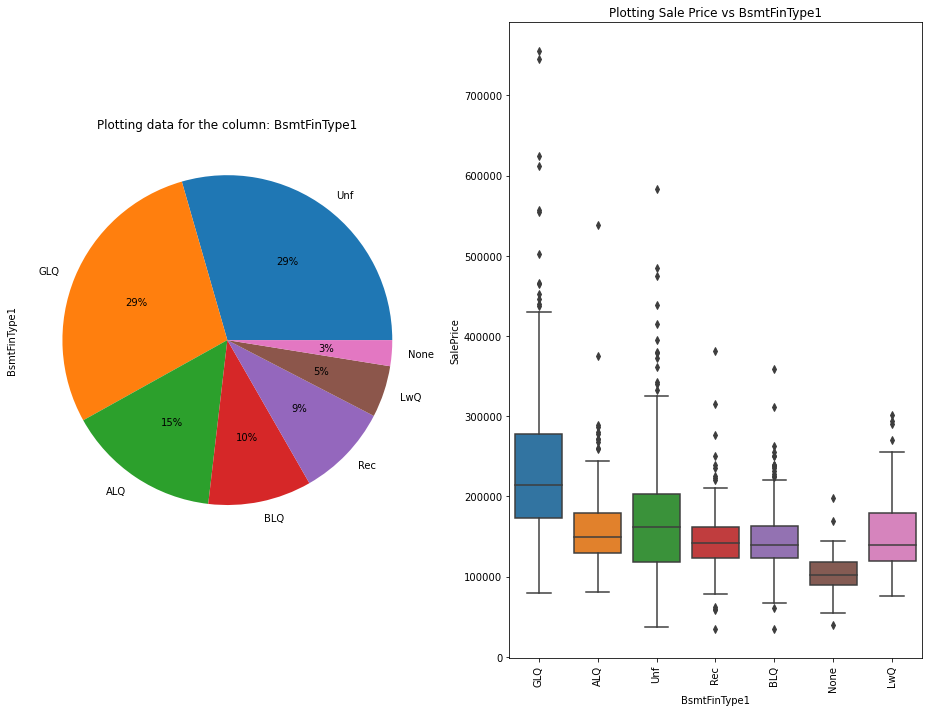

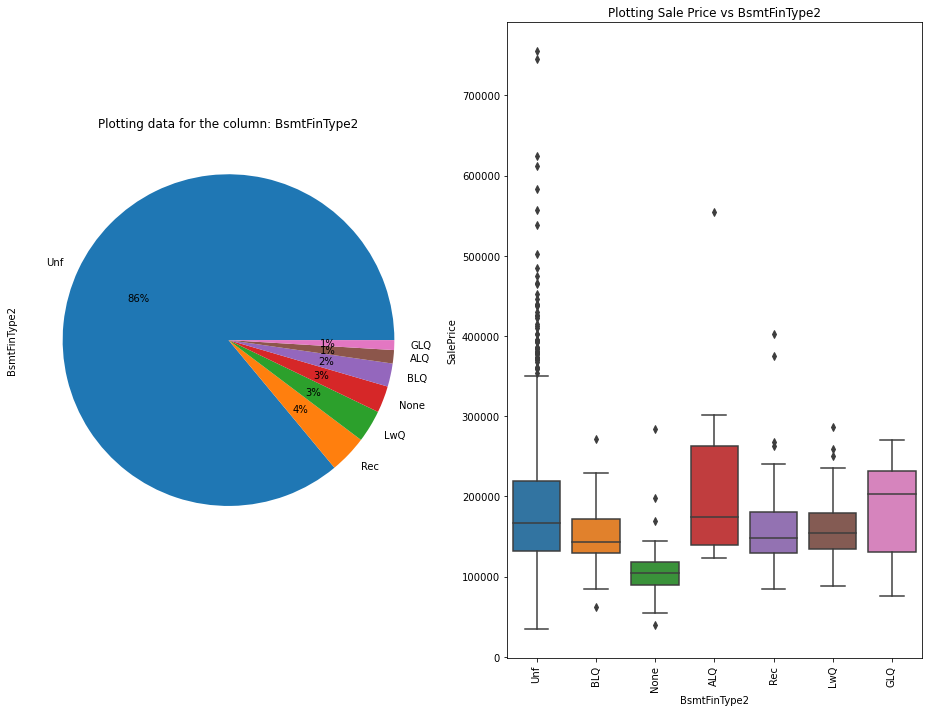

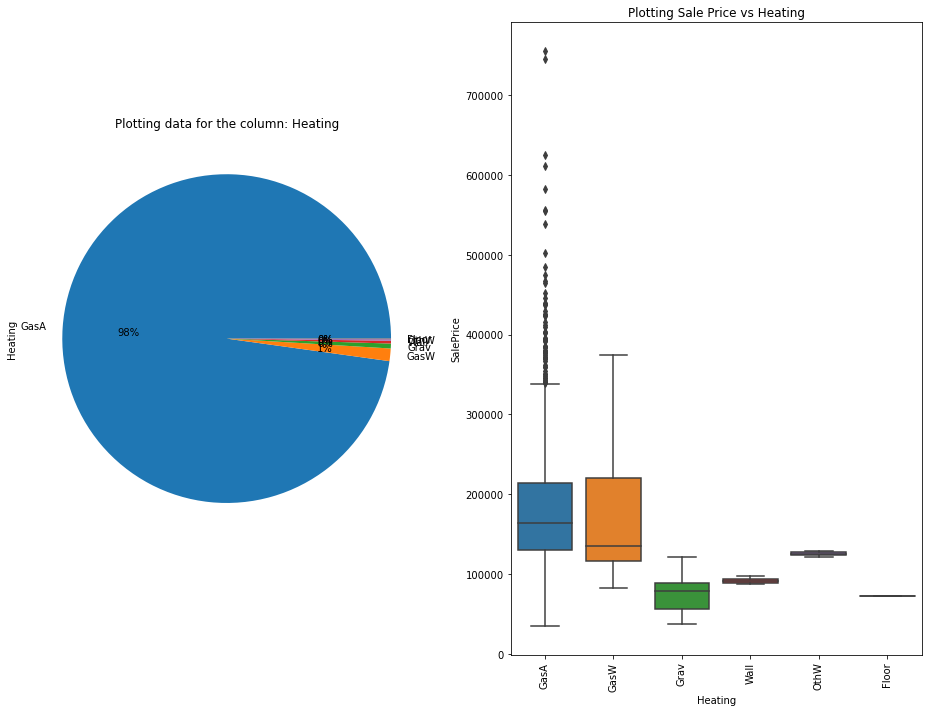

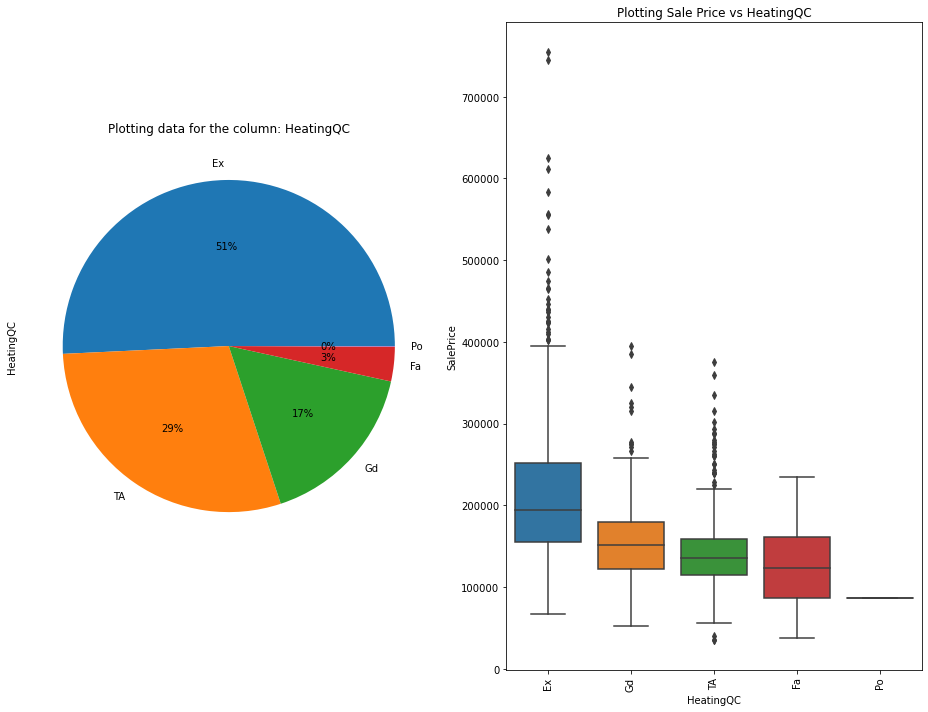

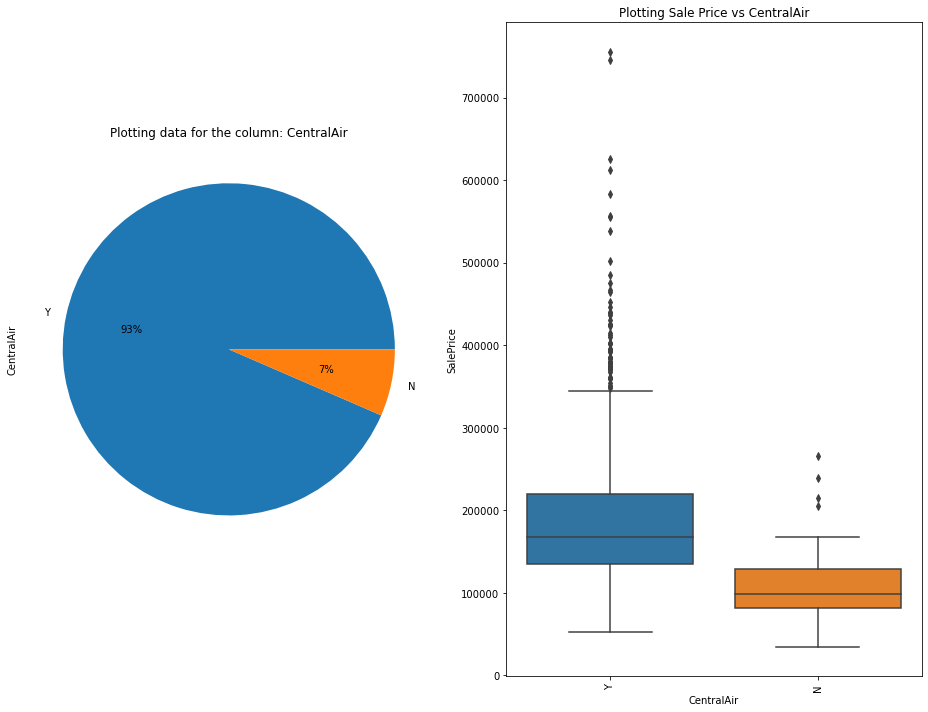

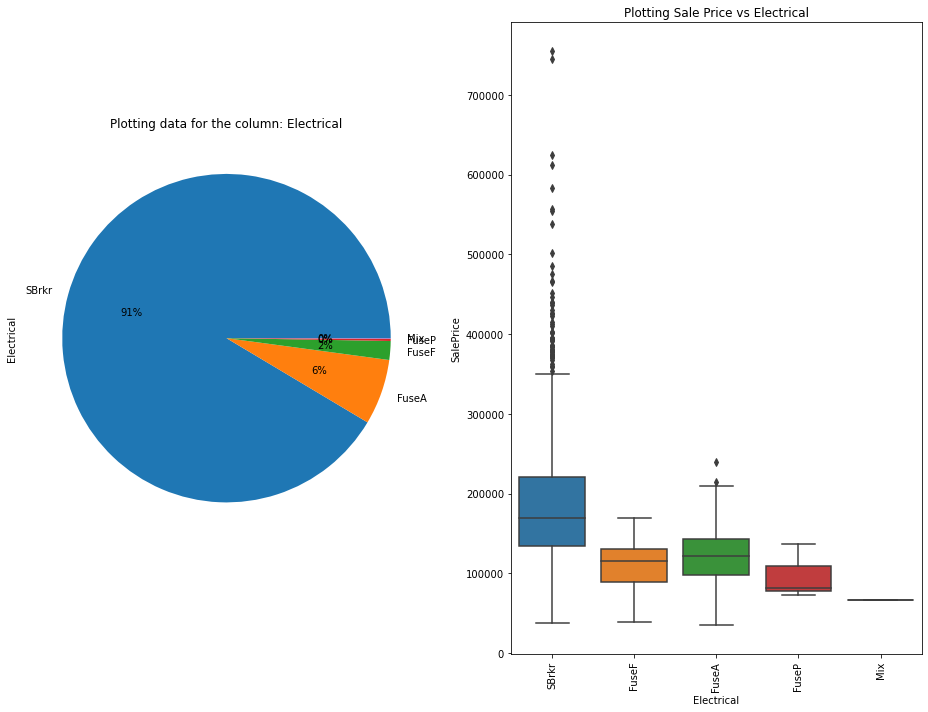

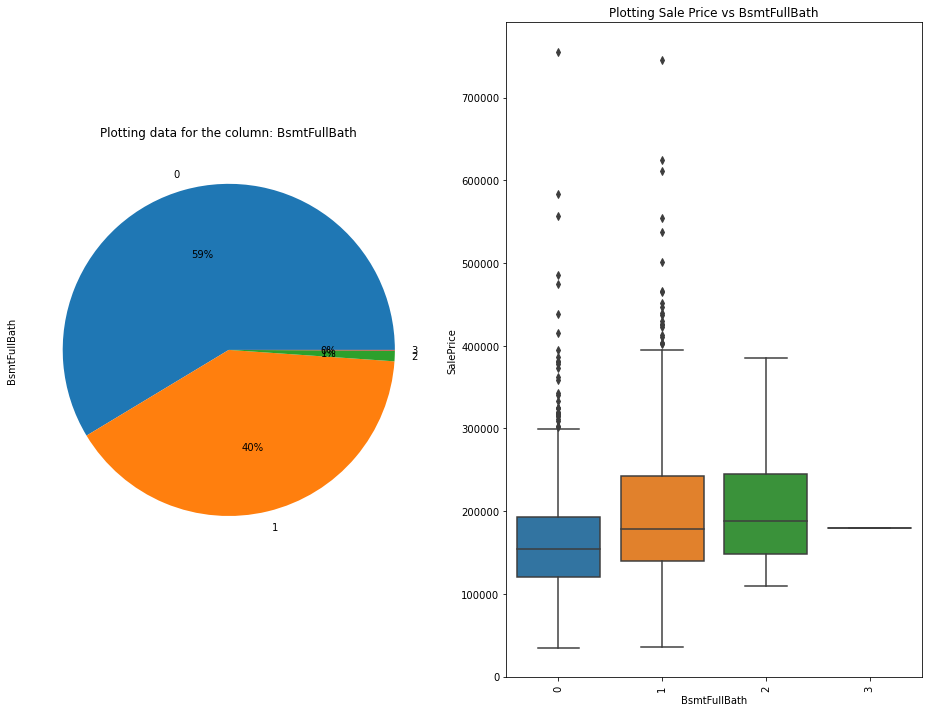

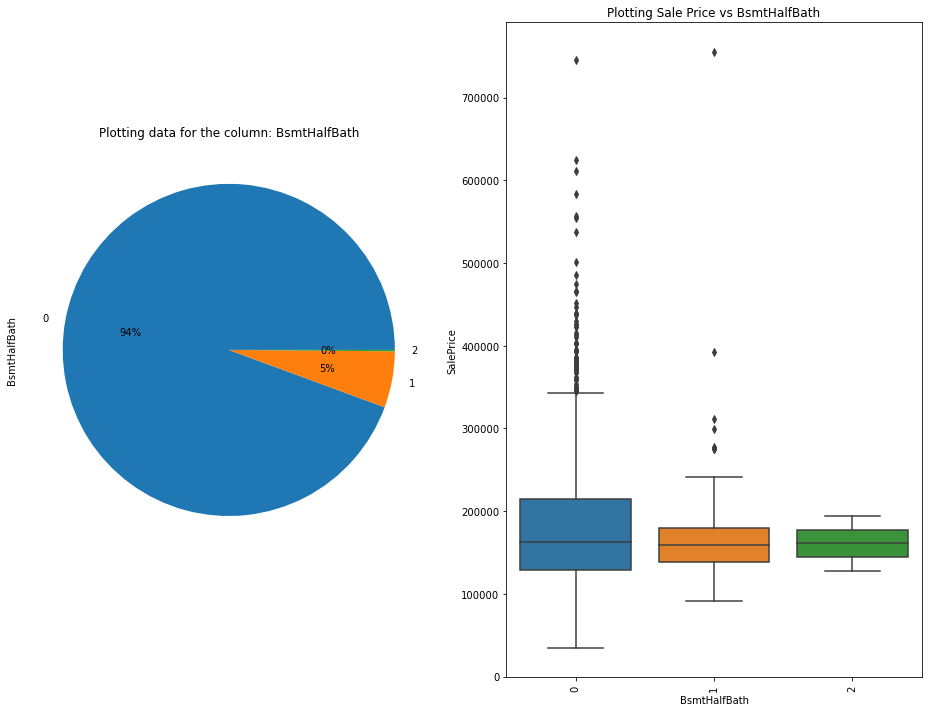

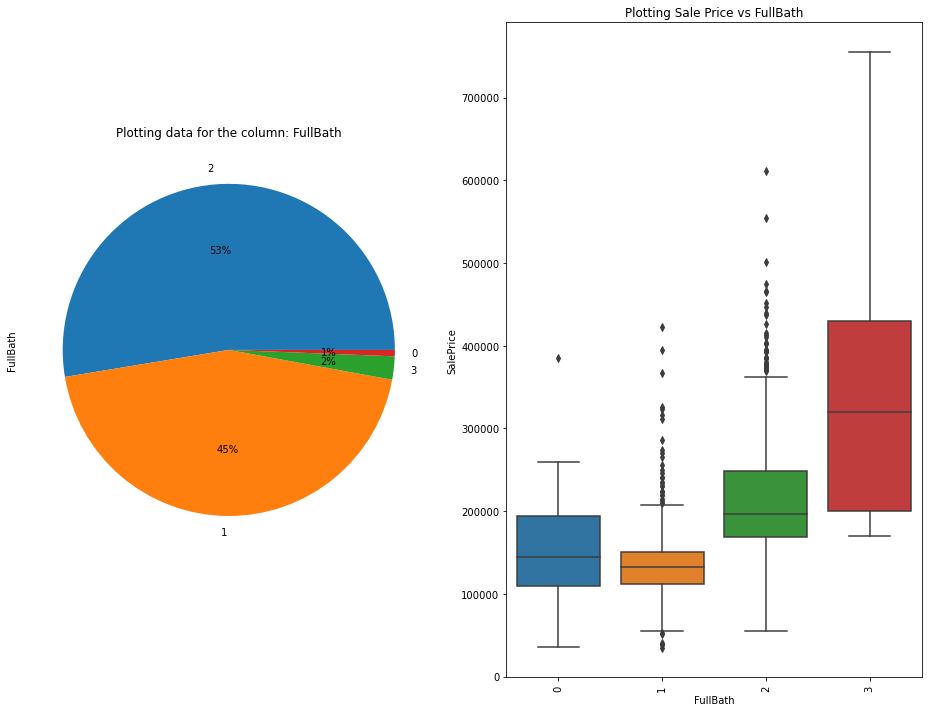

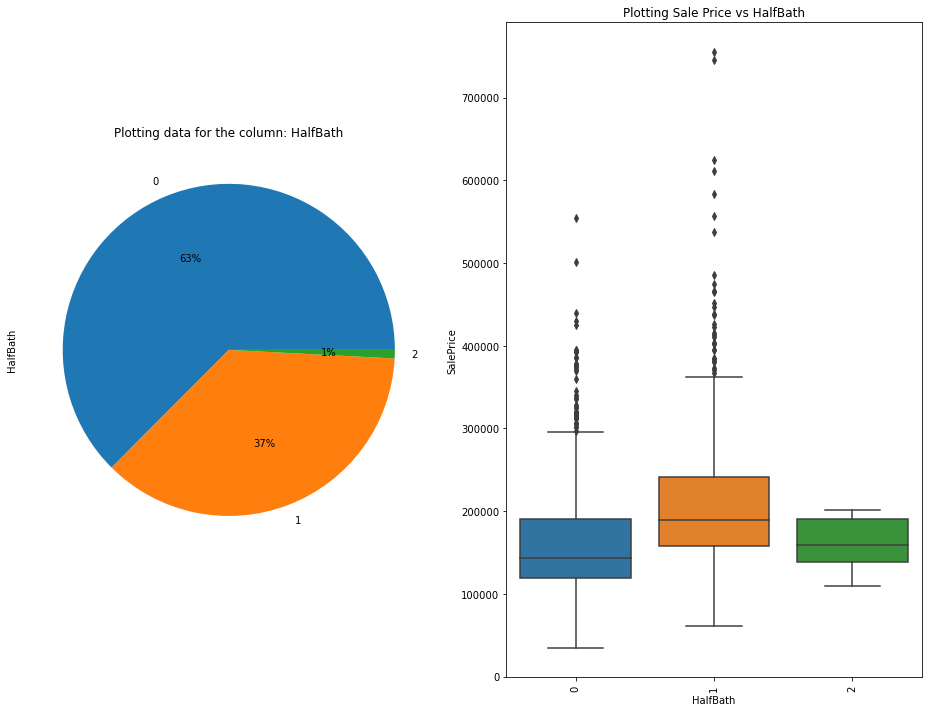

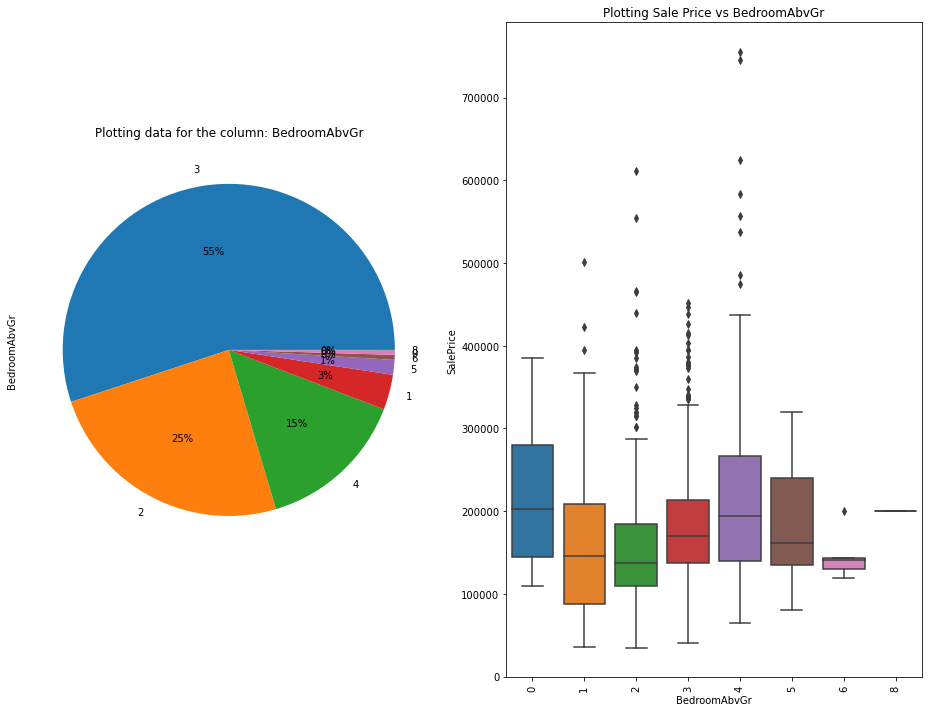

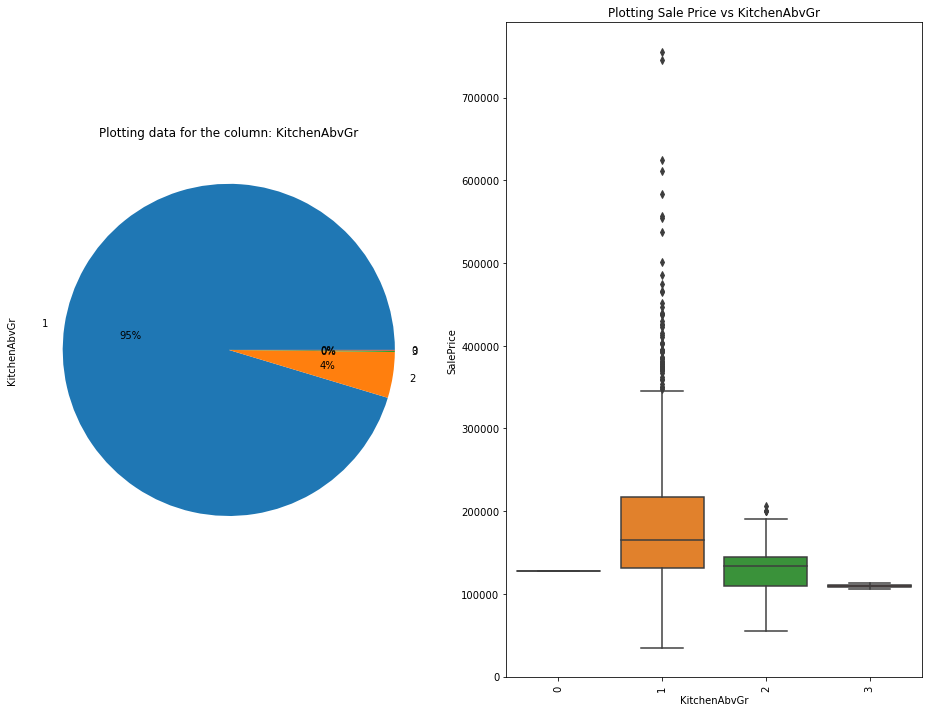

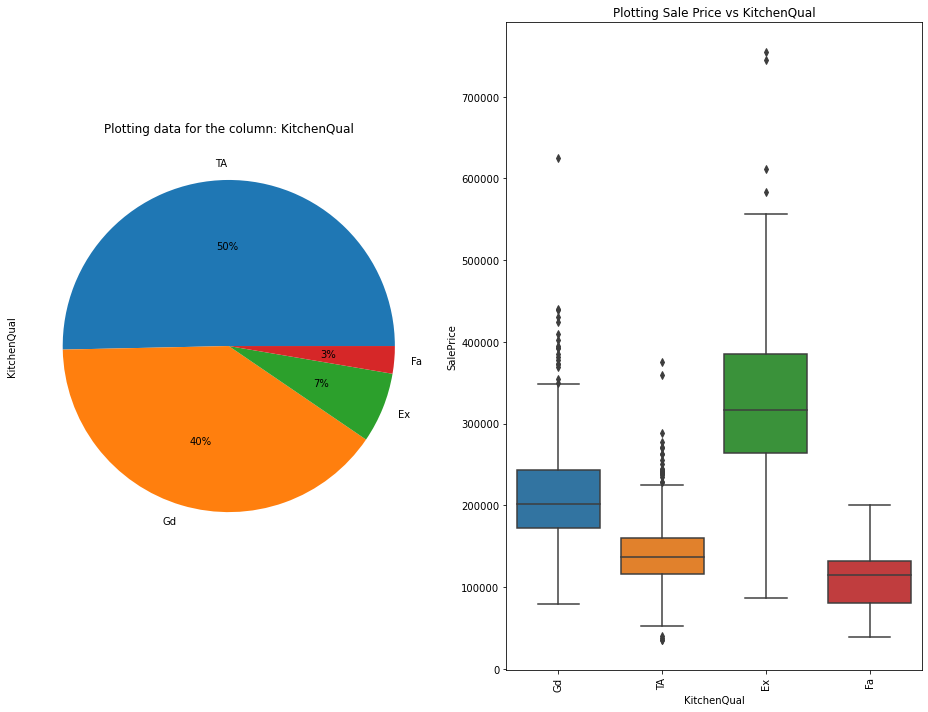

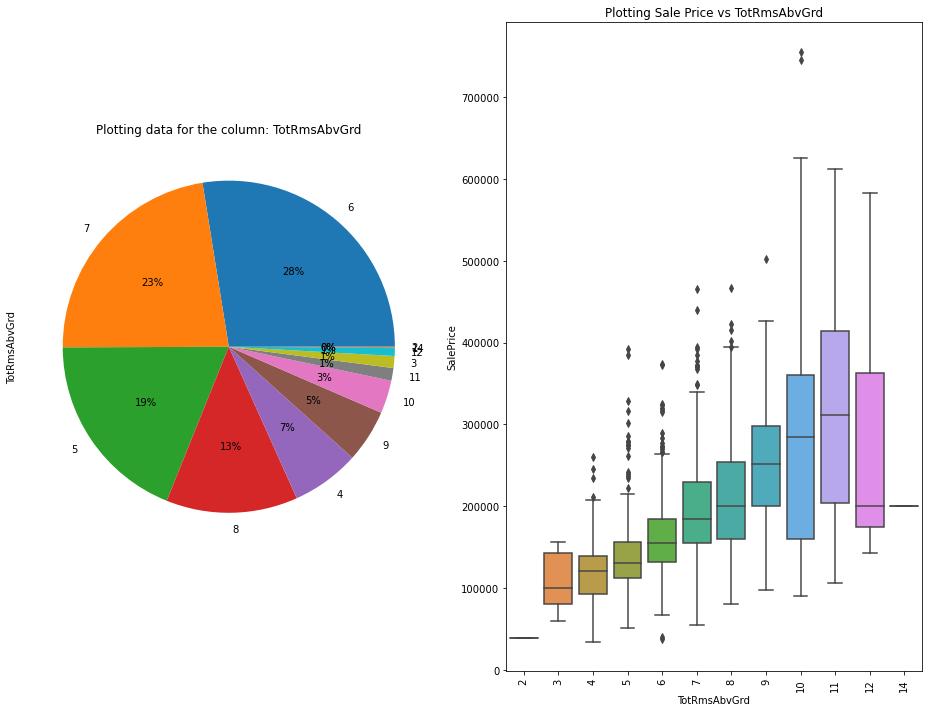

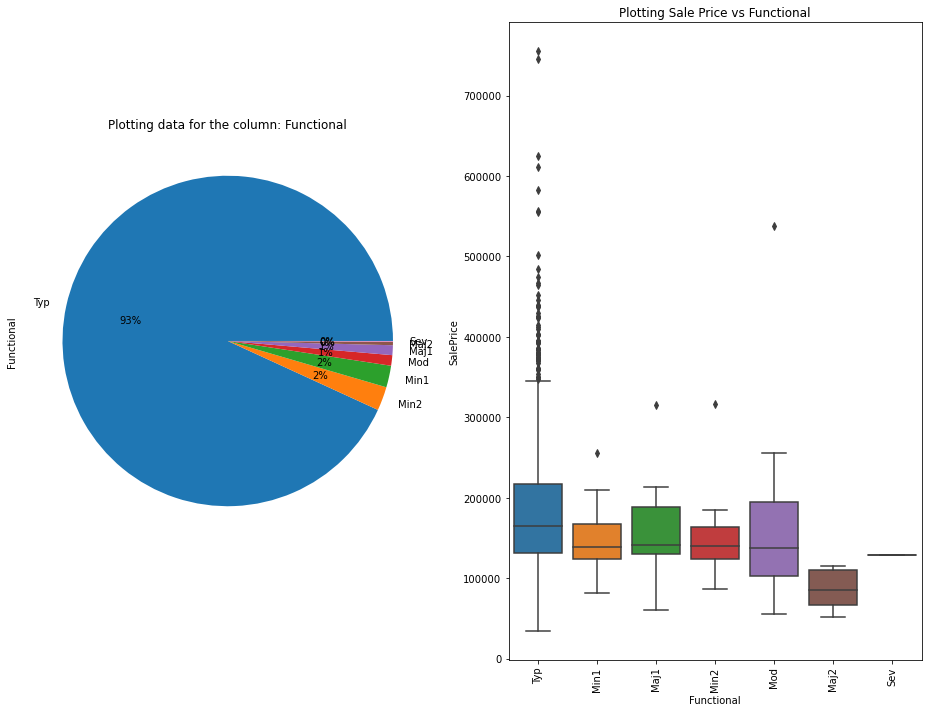

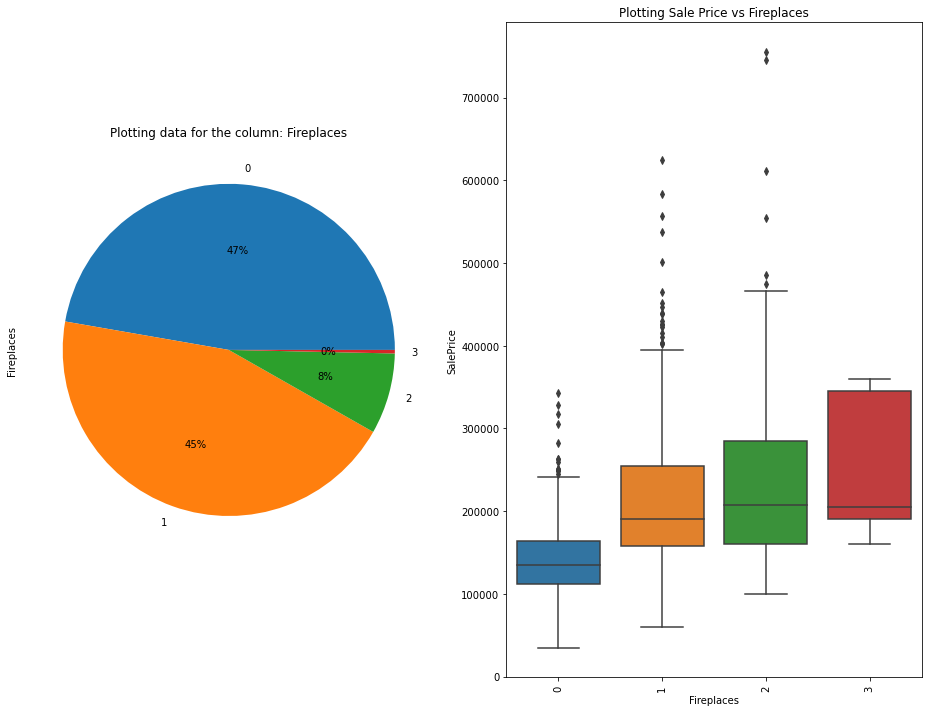

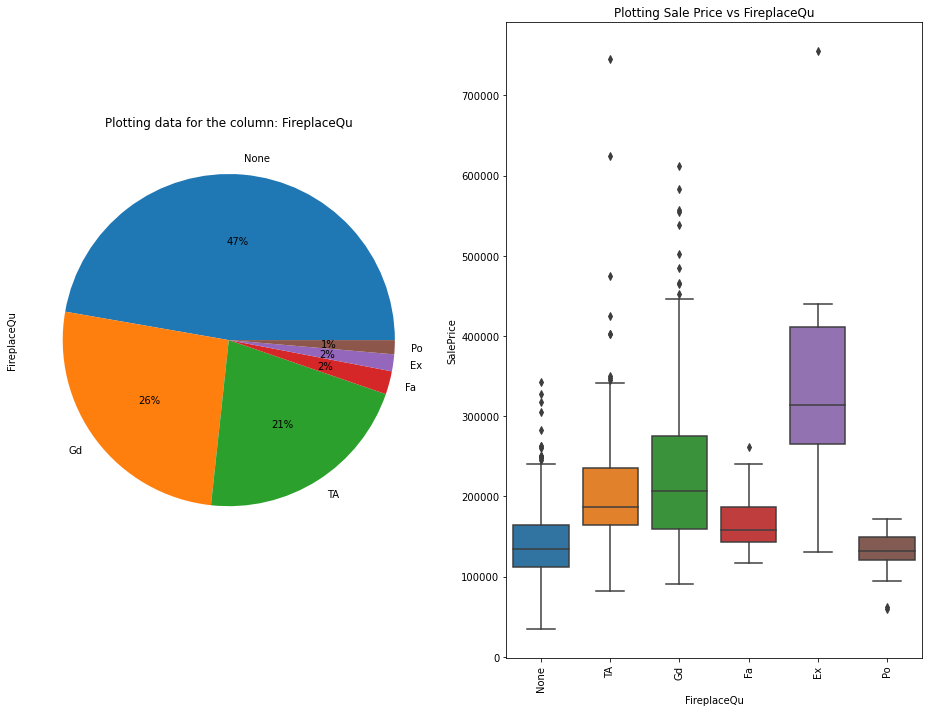

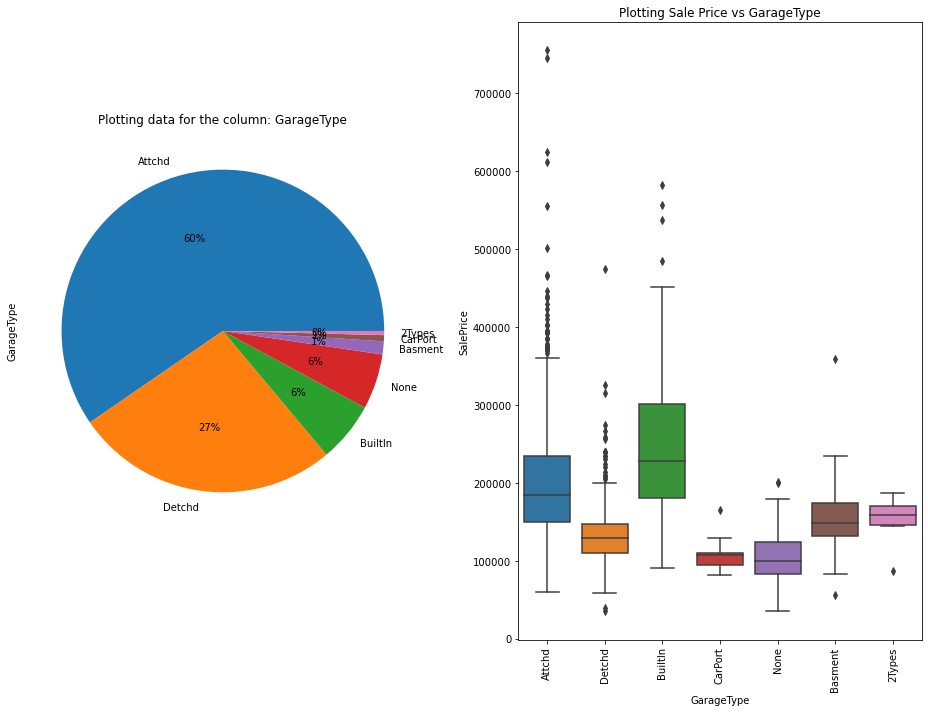

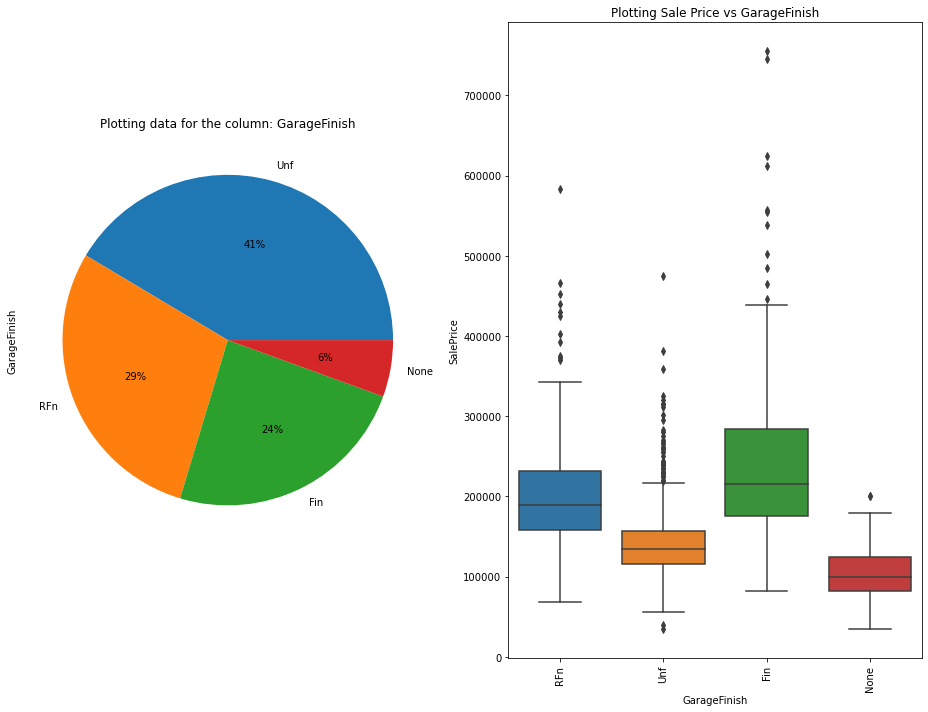

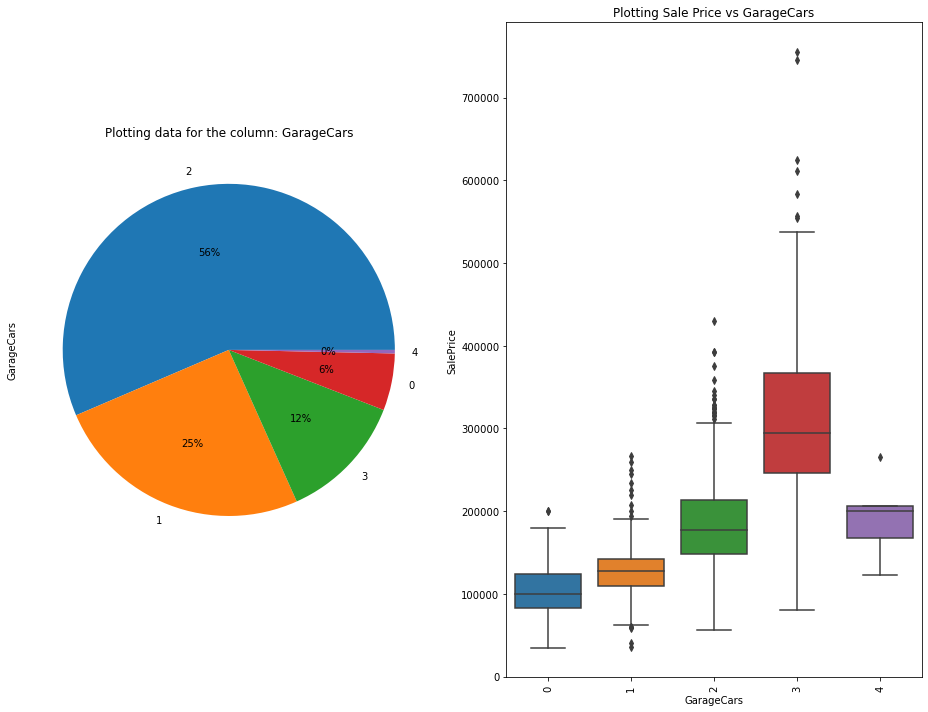

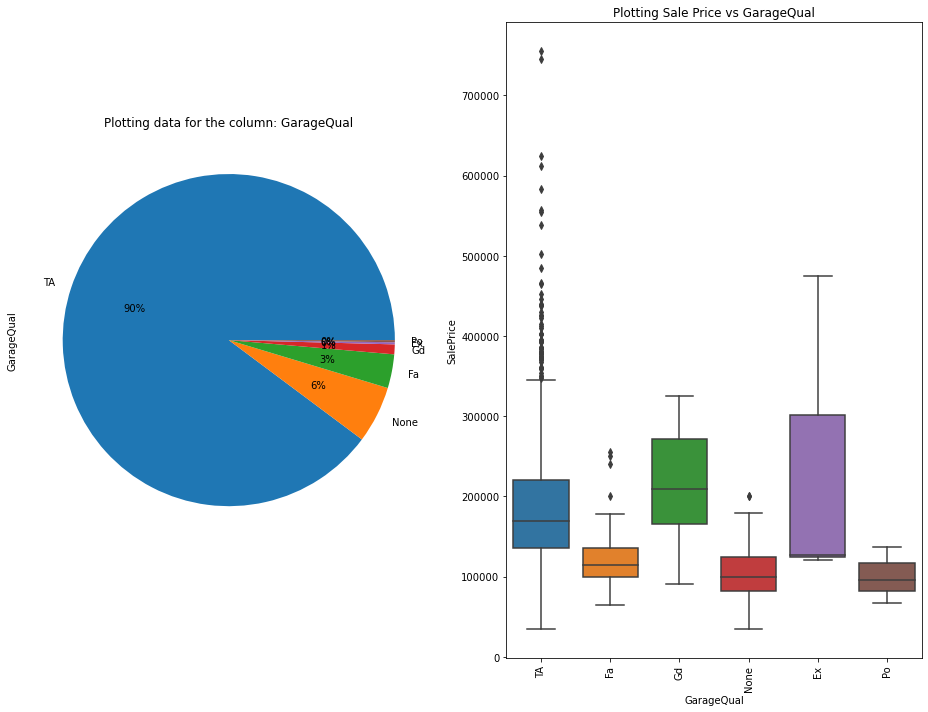

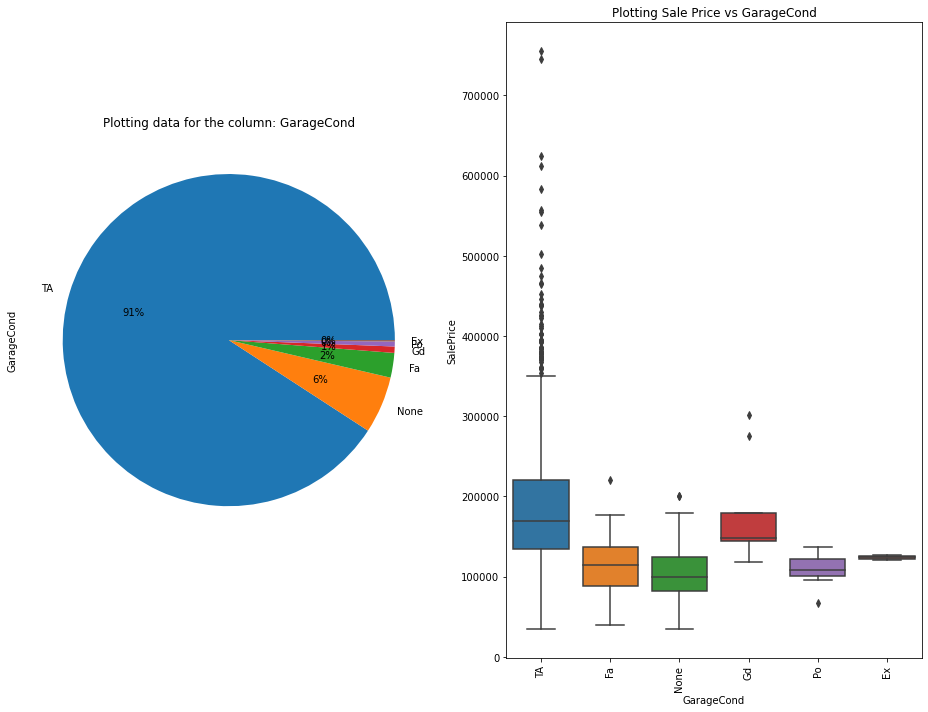

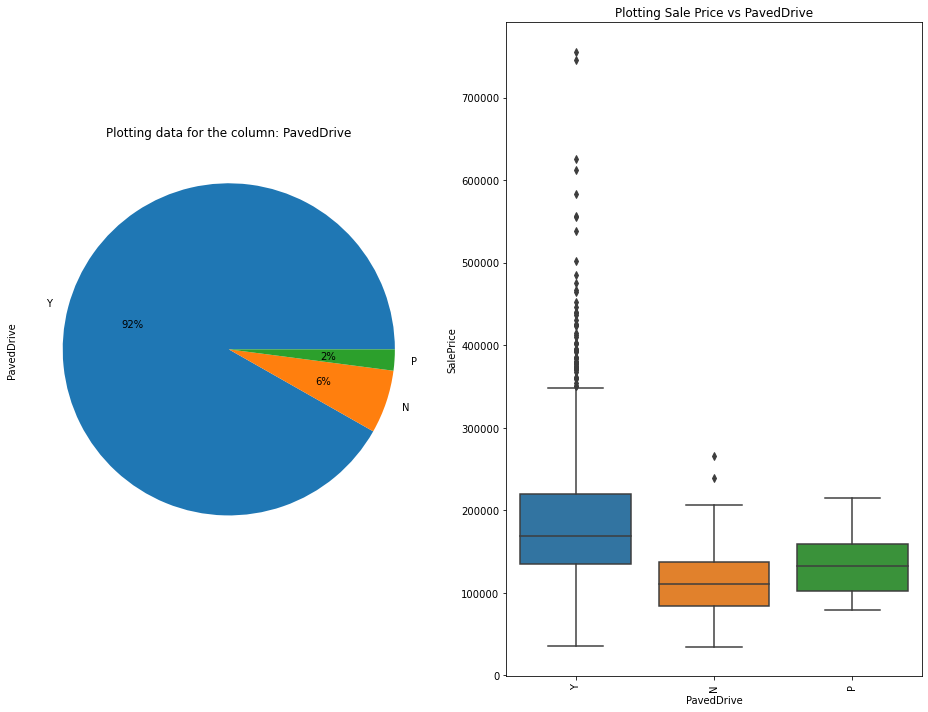

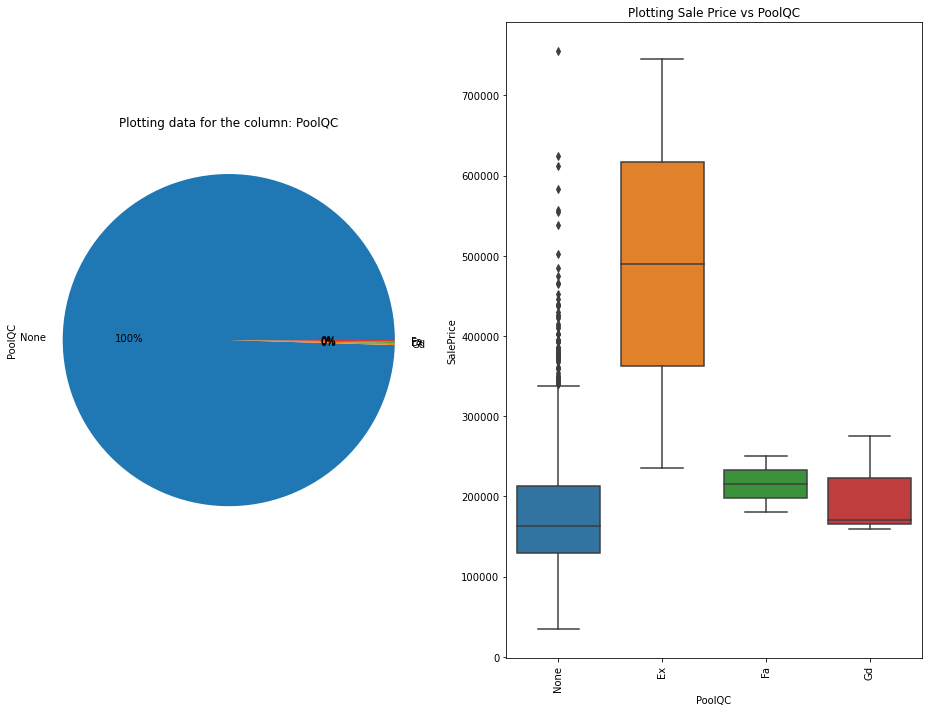

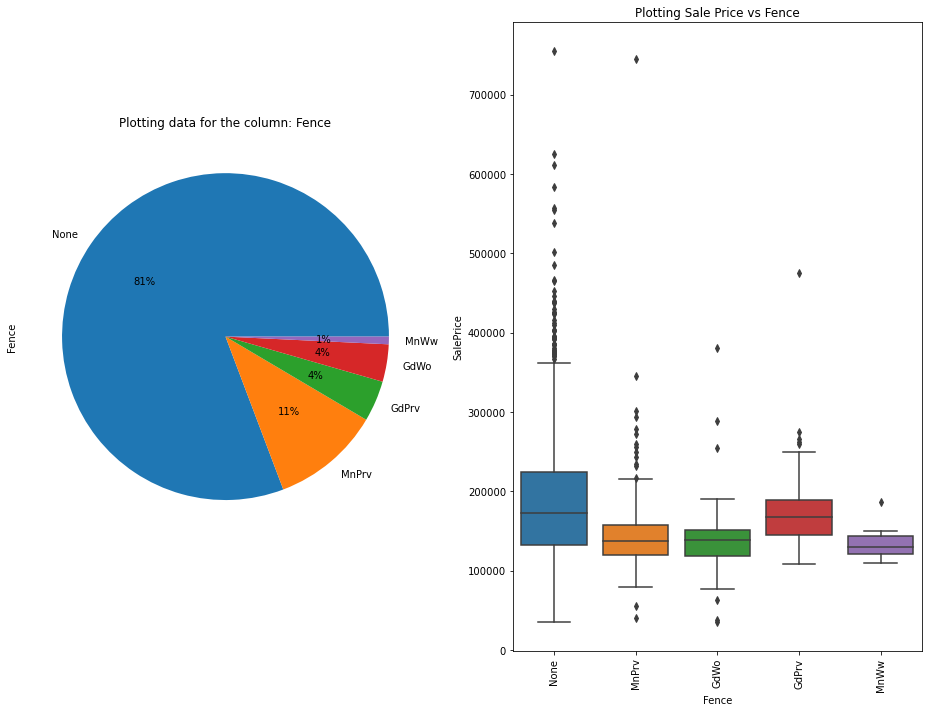

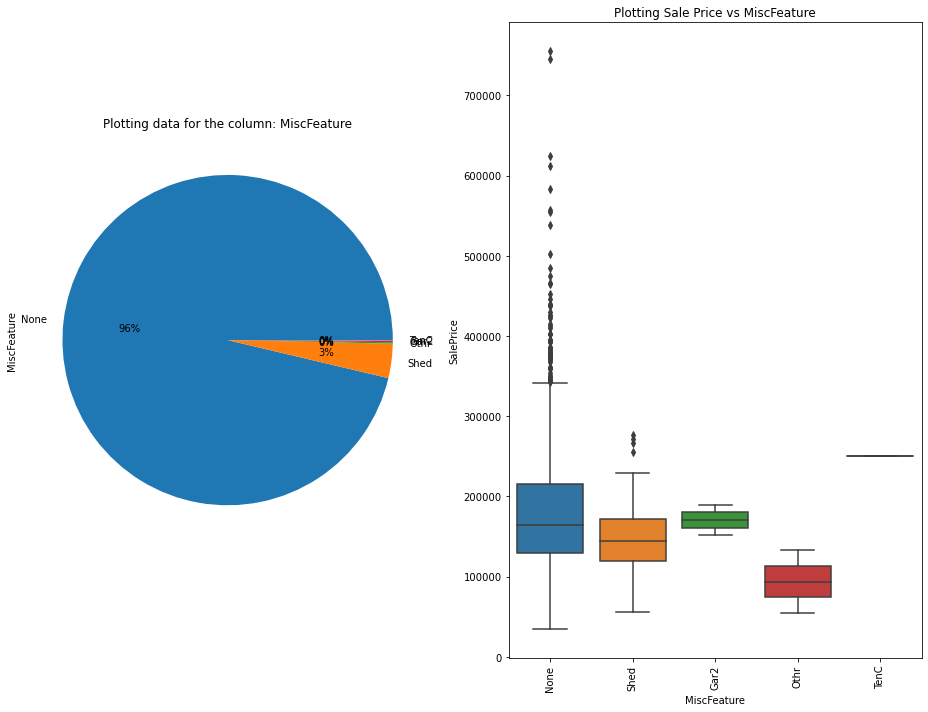

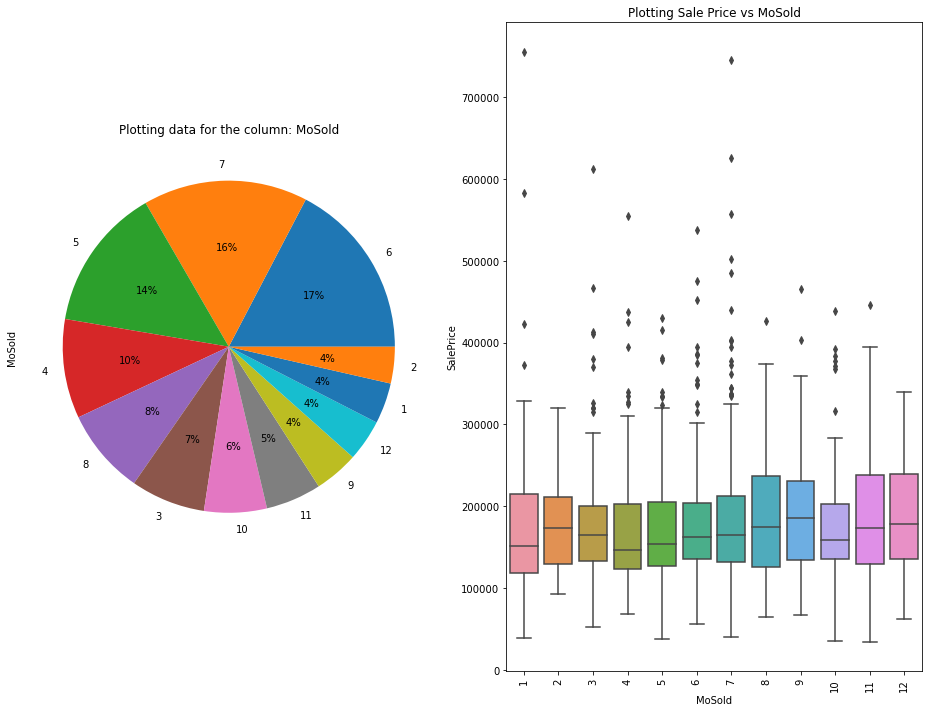

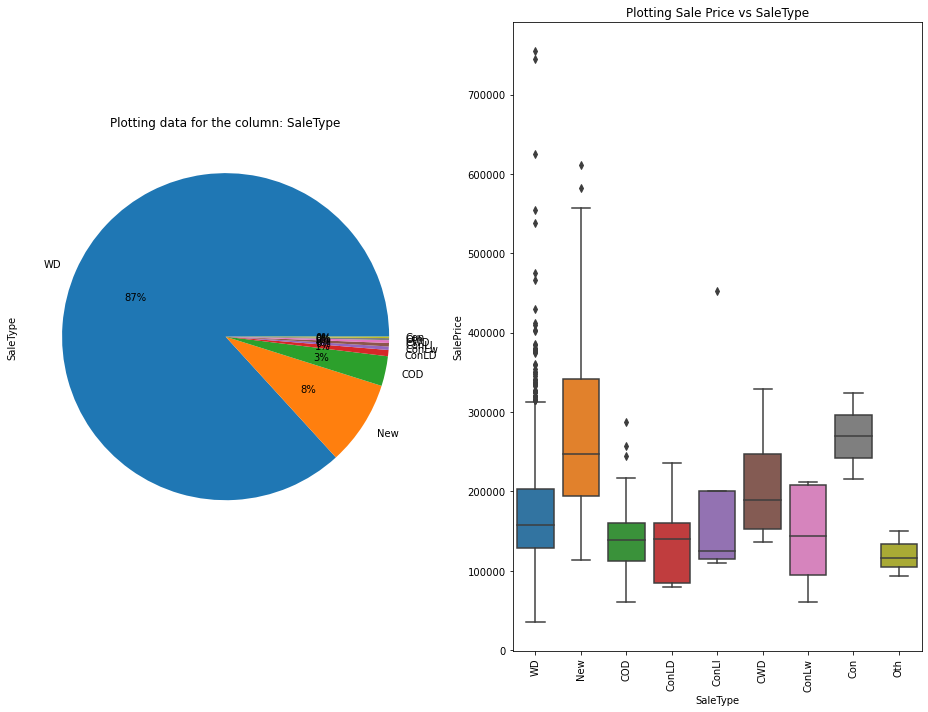

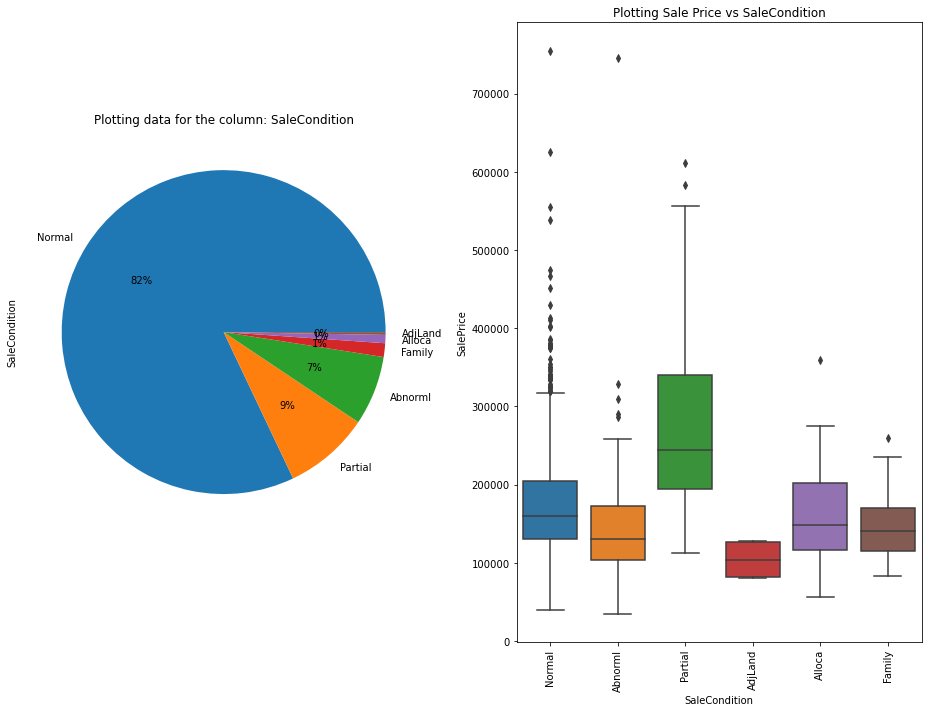

In [11]:
for col in categoricalCols:
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(121)
    df[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ col)
    
    ax2 = plt.subplot(122)
    sns.boxplot(x= col, y = 'SalePrice', data = df, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting Sale Price vs '+col)


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show();

In [12]:
# Dropping the columns that will not be useful because they do not have any variation in its values
df.drop(['Utilities','Street','Alley','Condition2','Heating','PoolQC','MiscFeature'],axis=1,inplace=True)

In [13]:
L=['Utilities','Street','Alley','Condition2','Heating','PoolQC','MiscFeature']

categoricalCols = [ele for ele in categoricalCols if ele not in L]
#categoricalCols

#### Numerical columns

In [14]:
numCols=list(df.select_dtypes(include=['float64','int64']).columns)



Distribution for- LotFrontage


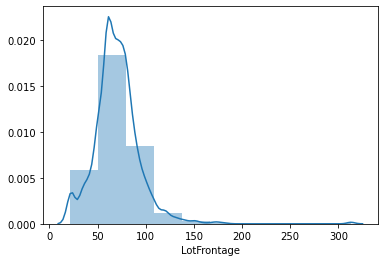

Distribution for- LotArea


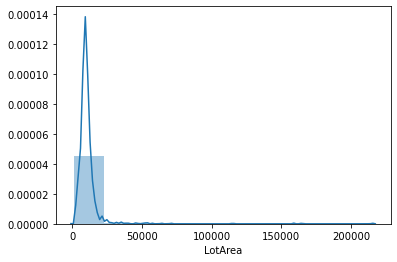

Distribution for- YearBuilt


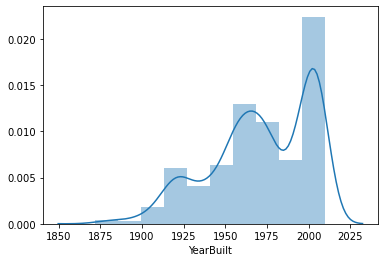

Distribution for- YearRemodAdd


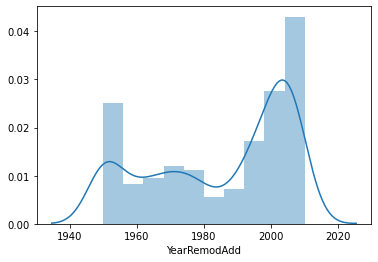

Distribution for- MasVnrArea


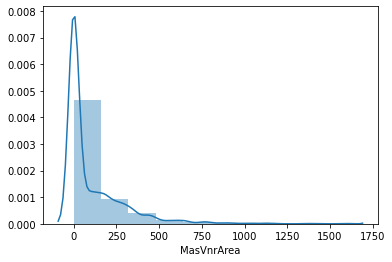

Distribution for- BsmtFinSF1


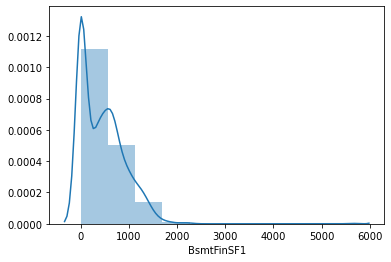

Distribution for- BsmtFinSF2


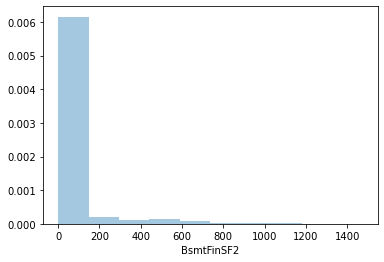

Distribution for- BsmtUnfSF


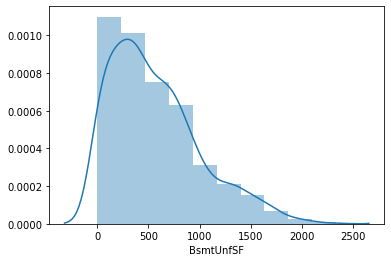

Distribution for- TotalBsmtSF


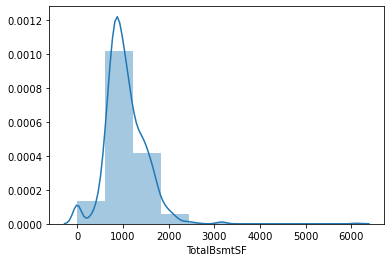

Distribution for- 1stFlrSF


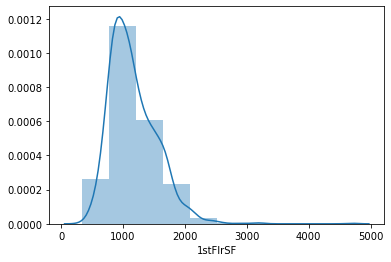

Distribution for- 2ndFlrSF


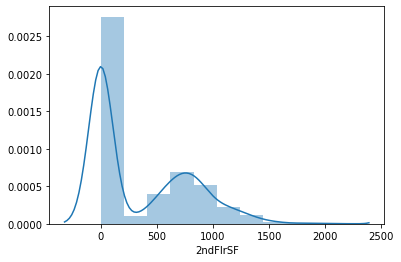

Distribution for- LowQualFinSF


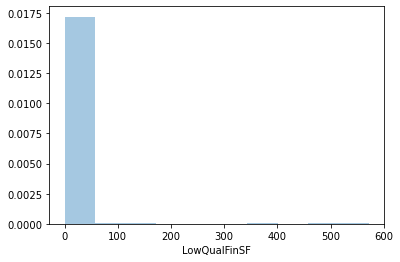

Distribution for- GrLivArea


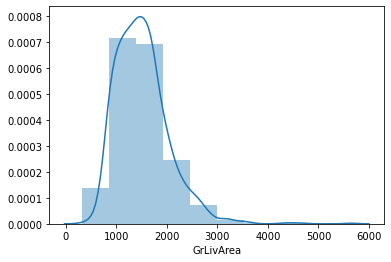

Distribution for- GarageYrBlt


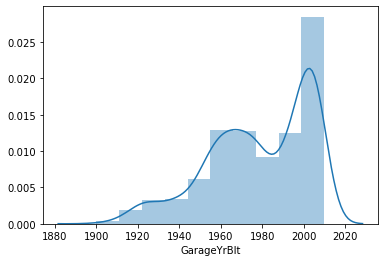

Distribution for- GarageArea


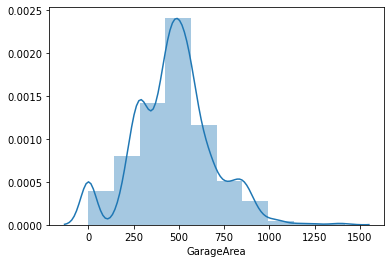

Distribution for- WoodDeckSF


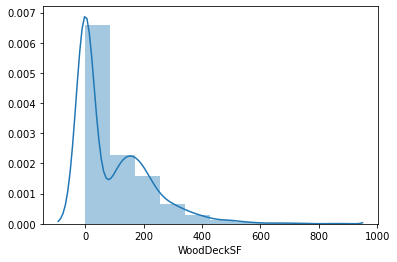

Distribution for- OpenPorchSF


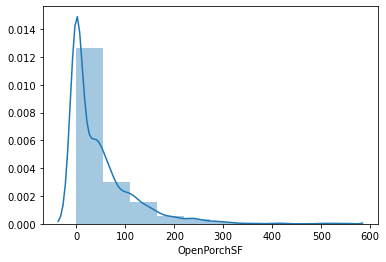

Distribution for- EnclosedPorch


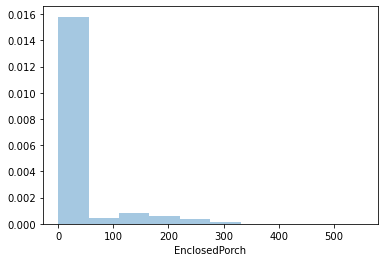

Distribution for- 3SsnPorch


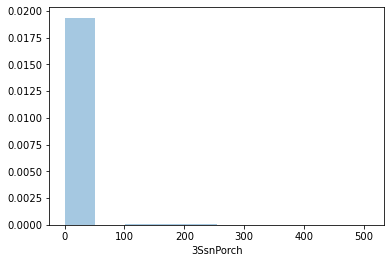

Distribution for- ScreenPorch


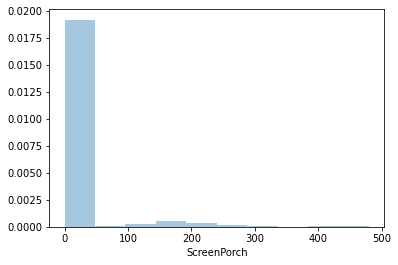

Distribution for- PoolArea


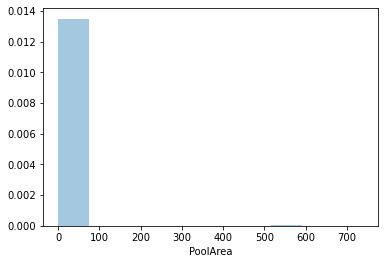

Distribution for- MiscVal


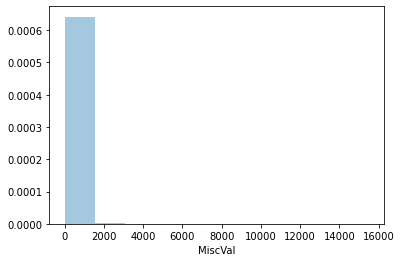

Distribution for- YrSold


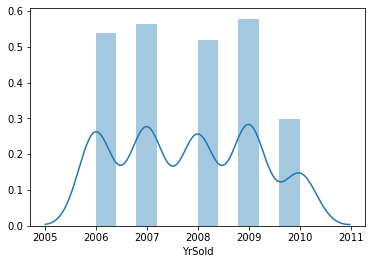

Distribution for- SalePrice


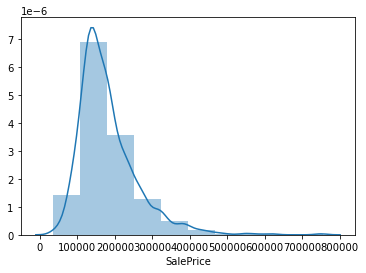

In [15]:
# plotiing distribution plot for numeric columns
for col in numCols:
    print("Distribution for-",col)
    sns.distplot(df[col],bins=10)
    plt.show()

In [16]:
L=['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
for col in L:
    df[col]=2012-df[col]

Boxplot for LotFrontage


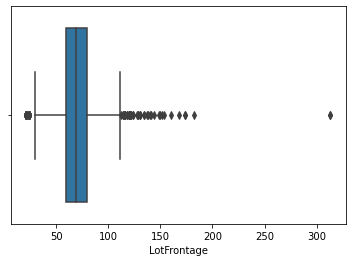

Boxplot for LotArea


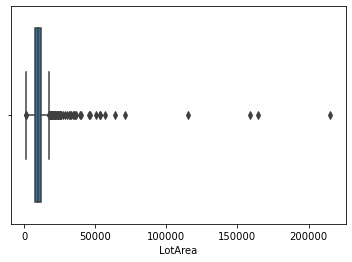

Boxplot for YearBuilt


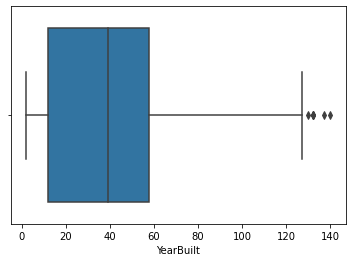

Boxplot for YearRemodAdd


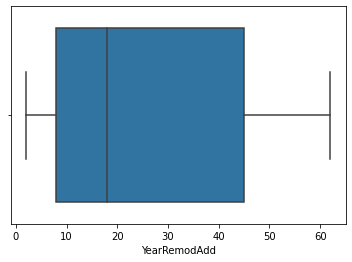

Boxplot for MasVnrArea


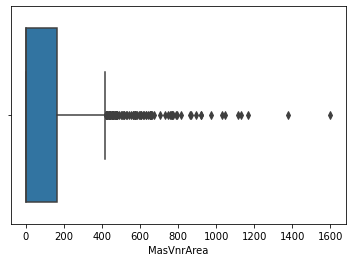

Boxplot for BsmtFinSF1


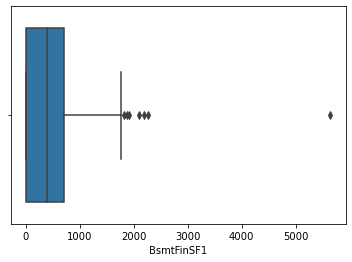

Boxplot for BsmtFinSF2


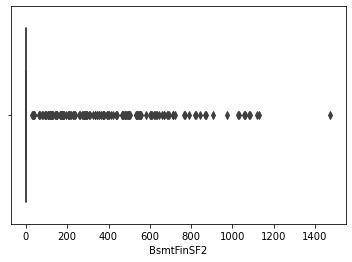

Boxplot for BsmtUnfSF


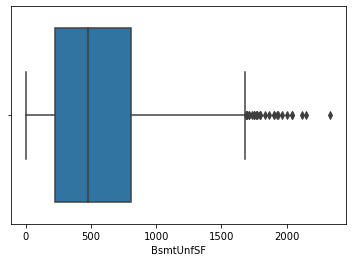

Boxplot for TotalBsmtSF


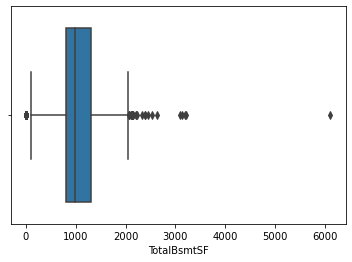

Boxplot for 1stFlrSF


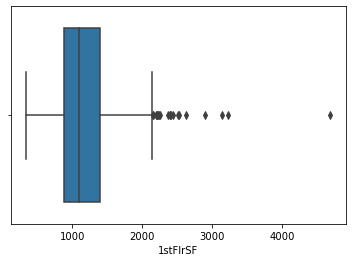

Boxplot for 2ndFlrSF


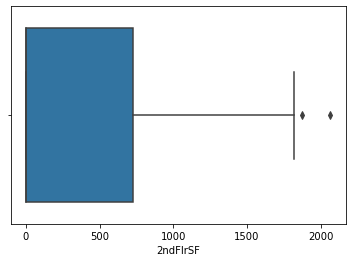

Boxplot for LowQualFinSF


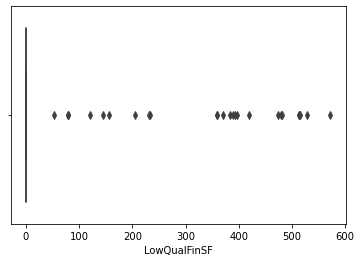

Boxplot for GrLivArea


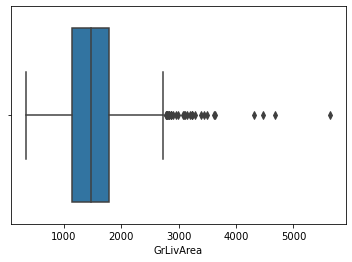

Boxplot for GarageYrBlt


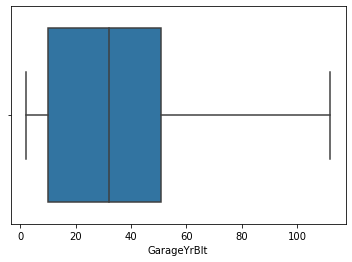

Boxplot for GarageArea


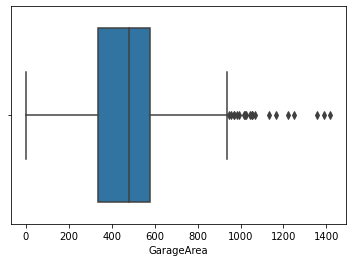

Boxplot for WoodDeckSF


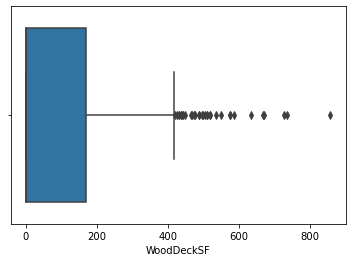

Boxplot for OpenPorchSF


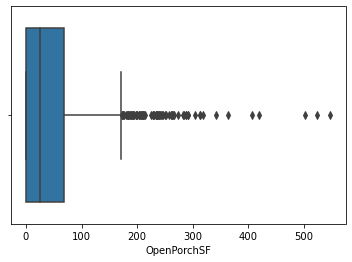

Boxplot for EnclosedPorch


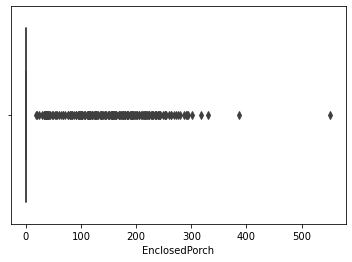

Boxplot for 3SsnPorch


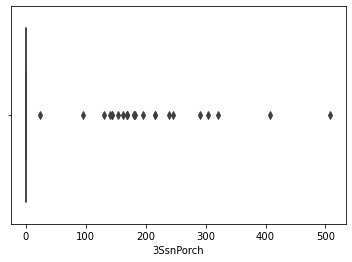

Boxplot for ScreenPorch


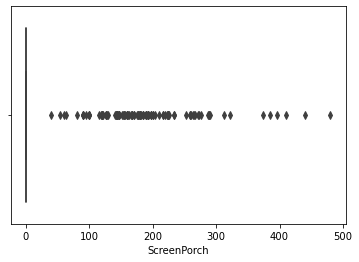

Boxplot for PoolArea


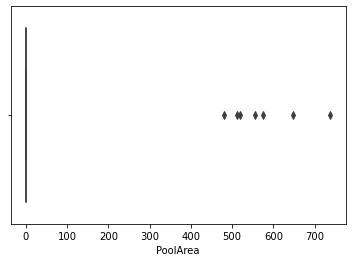

Boxplot for MiscVal


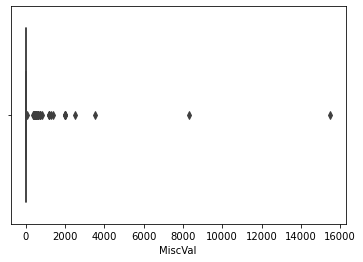

Boxplot for YrSold


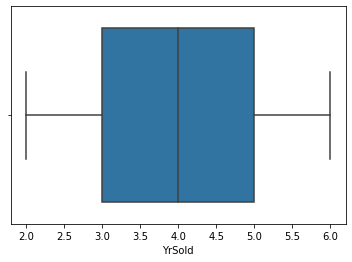

Boxplot for SalePrice


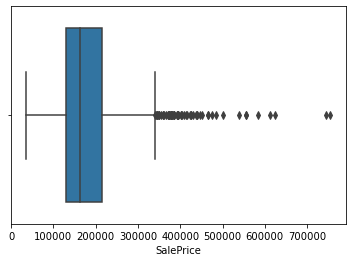

In [17]:
# plotting boxplot for numeric columns to spot outliers
for col in numCols:
    print('Boxplot for '+ col)
    sns.boxplot(df[col])
    plt.show();

#### Observations from the above plots:
- Very low variance found in MiscVal, PoolArea,ScreenPorch, 3SsnPorch, EnclosedPorch, LowQualFinSF, BsmtFinSF2
- Other numeric columns also has outliers which needs to be treated.

In [18]:
df[numCols].isna().sum()

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
YrSold             0
SalePrice          0
dtype: int64

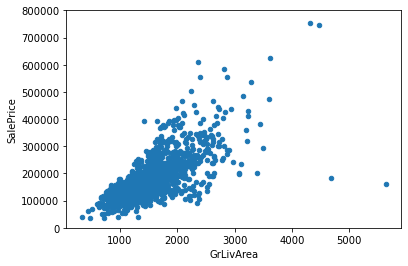

In [19]:
df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

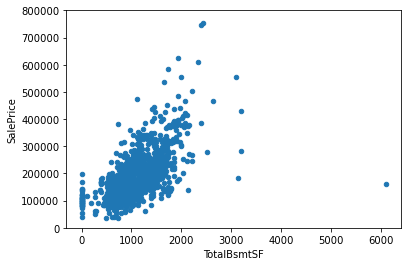

In [20]:
df.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

In [21]:
corrmat=df.corr()
corrmat


LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage       1.000000  0.426095  -0.123349     -0.088866    0.193458   
LotArea           0.426095  1.000000  -0.014228     -0.013788    0.104160   
YearBuilt        -0.123349 -0.014228   1.000000      0.592855   -0.315707   
YearRemodAdd     -0.088866 -0.013788   0.592855      1.000000   -0.179618   
MasVnrArea        0.193458  0.104160  -0.315707     -0.179618    1.000000   
BsmtFinSF1        0.233633  0.214103  -0.249503     -0.128451    0.264736   
BsmtFinSF2        0.049900  0.111170   0.049107      0.067759   -0.072319   
BsmtUnfSF         0.132644 -0.002618  -0.149040     -0.181133    0.114442   
TotalBsmtSF       0.392075  0.260833  -0.391452     -0.291066    0.363936   
1stFlrSF          0.457181  0.299475  -0.281986     -0.240379    0.344501   
2ndFlrSF          0.080177  0.050986  -0.010308     -0.140024    0.174561   
LowQualFinSF      0.038469  0.004779   0.183784      0.062419   -0.069071   
GrLivArea         0.402797  0.263116  -0.199010     -0.287389    0.390857   
GarageYrBlt      -0.070250  0.024947   0.825667      0.642277   -0.252691   
GarageArea        0.344997  0.180403  -0.478954     -0.371600    0.373066   
WoodDeckSF        0.088521  0.171698  -0.224880     -0.205726    0.159718   
OpenPorchSF       0.151972  0.084774  -0.188686     -0.226298    0.125703   
EnclosedPorch     0.010700 -0.018340   0.387268      0.193919   -0.110204   
3SsnPorch         0.070029  0.020423  -0.031355     -0.045286    0.018796   
ScreenPorch       0.041383  0.043160   0.050364      0.038740    0.061466   
PoolArea          0.206167  0.077672  -0.004950     -0.005829    0.011723   
MiscVal           0.003368  0.038068   0.034383      0.010286   -0.029815   
YrSold           -0.007450  0.014261  -0.013618      0.035743    0.008201   
SalePrice         0.351799  0.263843  -0.522897     -0.507101    0.477493   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
LotFrontage      0.233633    0.049900   0.132644     0.392075  0.457181   
LotArea          0.214103    0.111170  -0.002618     0.260833  0.299475   
YearBuilt       -0.249503    0.049107  -0.149040    -0.391452 -0.281986   
YearRemodAdd    -0.128451    0.067759  -0.181133    -0.291066 -0.240379   
MasVnrArea       0.264736   -0.072319   0.114442     0.363936  0.344501   
BsmtFinSF1       1.000000   -0.050117  -0.495251     0.522396  0.445863   
BsmtFinSF2      -0.050117    1.000000  -0.209294     0.104810  0.097117   
BsmtUnfSF       -0.495251   -0.209294   1.000000     0.415360  0.317987   
TotalBsmtSF      0.522396    0.104810   0.415360     1.000000  0.819530   
1stFlrSF         0.445863    0.097117   0.317987     0.819530  1.000000   
2ndFlrSF        -0.137079   -0.099260   0.004469    -0.174512 -0.202646   
LowQualFinSF    -0.064503    0.014807   0.028167    -0.033245 -0.014241   
GrLivArea        0.208171   -0.009640   0.240257     0.454868  0.566024   
GarageYrBlt     -0.153484    0.088011  -0.190708    -0.322445 -0.233449   
GarageArea       0.296970   -0.018227   0.183303     0.486665  0.489782   
WoodDeckSF       0.204306    0.067898  -0.005316     0.232019  0.235459   
OpenPorchSF      0.111761    0.003093   0.129005     0.247264  0.211671   
EnclosedPorch   -0.102303    0.036543  -0.002538    -0.095478 -0.065292   
3SsnPorch        0.026451   -0.029993   0.020764     0.037384  0.056104   
ScreenPorch      0.062021    0.088871  -0.012579     0.084489  0.088758   
PoolArea         0.140491    0.041709  -0.035092     0.126053  0.131525   
MiscVal          0.003571    0.004940  -0.023837    -0.018479 -0.021096   
YrSold          -0.014359   -0.031706   0.041258     0.014969  0.013604   
SalePrice        0.386420   -0.011378   0.214479     0.613581  0.605852   

               2ndFlrSF  LowQualFinSF  GrLivArea  GarageYrBlt  GarageArea  \
LotFrontage    0.080177      0.038469   0.402797    -0.070250    0.344997   
LotArea        0.050986      0.004779   0.263116     0.0249

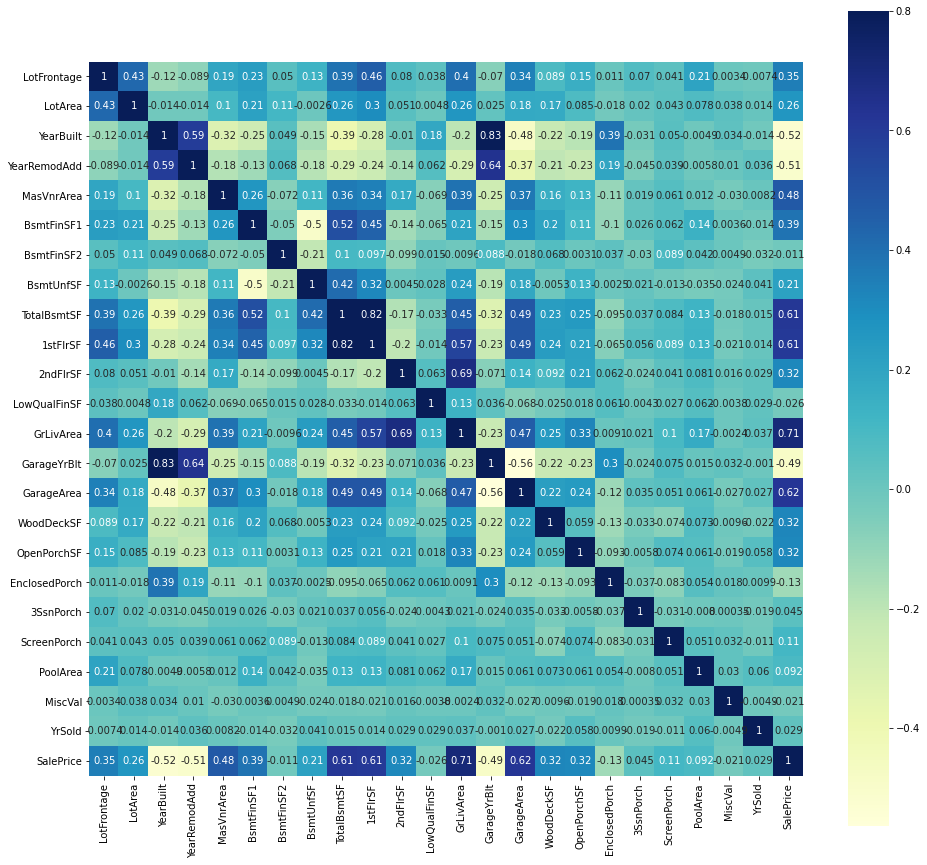

In [22]:
f, ax = plt.subplots(figsize=(16,15))
sns.heatmap(corrmat, vmax=.8, cmap="YlGnBu", square=True,annot=True);

#### The following observations can be made from the heatmap:
- SalePrice is highly (positively) correlated with GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, YearBuilt.
- We can notice all these variables represent the surface area of the living space.
- Among the independent variables, there is a strong correlation between the GarageYrBlt and YearBuilt. This is pretty much observed among all the year columns. 

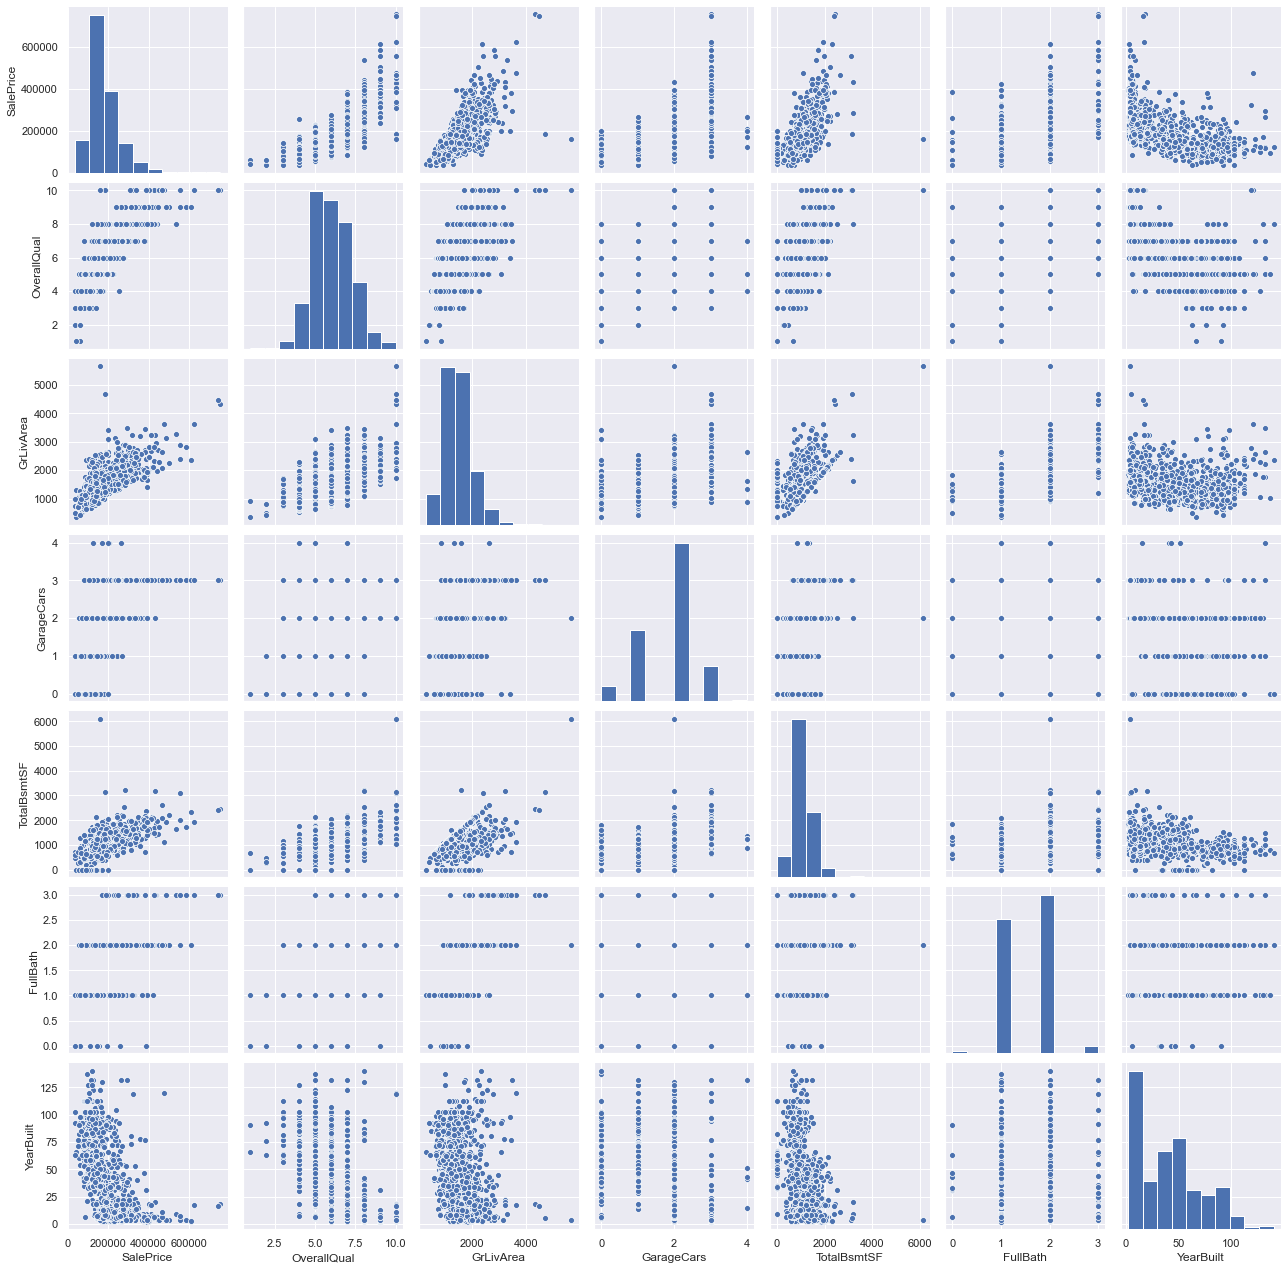

In [23]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols],size=2.5)
plt.show();

#### The observations from the heatmap can be verified in the pairplot too. 
- We can observe linear relation of SalePrice with GrLivArea, TotalBsmtSF

In [24]:
# Imputing the null values in LotFrontage by mean values
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
df=df.drop('GarageYrBlt',axis=1)
numCols.remove('GarageYrBlt')

In [25]:
# Dropping rows where Electrical and MasVnrType is null. Only 0.07 and 0.55% or total values.

df=df[~df.Electrical.isna()]
df=df[~df.MasVnrType.isna()]

In [26]:
# Lets ensure there are not more null values
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [27]:
L=['LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',]

for col in L:
    Q1=df[col].quantile(0.1)
    Q3=df[col].quantile(0.9)
    IQR = Q3 - Q1
    df[col]=np.where(df[col] > Q3, Q3+1.5*IQR, df[col])
    df[col]=np.where(df[col] < Q1, Q1-1.5*IQR, df[col])

### Data Preparation<a id='dataPreparation'></a>
Go to [Index](#index).

#### We observed in the exploratory phase that the SalePrice which is our target variable is highly skewed. Lets check its skewness statistically

#### Kurtosis
Kurtosis is a measure of the “tailedness” of the probability distribution. A standard normal distribution has kurtosis of 3 and is recognized as mesokurtic. An increased kurtosis (>3) can be visualized as a thin “bell” with a high peak whereas a decreased kurtosis corresponds to a broadening of the peak and “thickening” of the tails. Kurtosis >3 is recognized as leptokurtic and <3 as platykurtic (lepto=thin; platy=broad). There are four different formats of kurtosis, the simplest is the population kurtosis; the ratio between the fourth moment and the variance.

In [28]:

# We can clearly observe high Kurtosis value for our SalePrice here.
df.SalePrice.kurt()

6.573025006423077

#### Skewness
In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [29]:
# Very evident skewness observed too.
df.SalePrice.skew()

1.8831110462405252

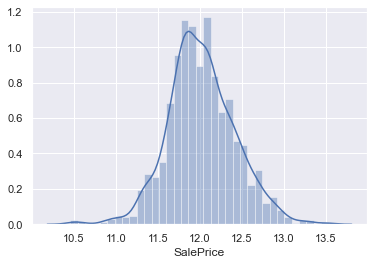

In [30]:
# Lets try to plot distribution plot for logarithmic value of the target variable
sns.distplot(np.log(df['SalePrice']));

#### This is a great improvment from the initial skewed to a normalized distribution. Lets validated it with the skewness and Kurtosis values

In [31]:
# During the exploratory phase, we observed that the SalePrice is highly skewed. 
df['transformedPrice']=np.log(df.SalePrice)

In [32]:
# Checking if the skewness has improved
df.transformedPrice.skew()

0.12193841342297697

In [33]:
df.transformedPrice.kurt()

0.8025375178446992

#### As we can see the skewness in the target column has improved greatly by converting it to its logarithmic value.

In [34]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPor

In [35]:
# Split into X and y
# Notice we are not taking the Id column
X=df.reindex(columns=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition']) # predictors in variable X
y=df['transformedPrice']

In [36]:
# creating dummy variables for categorical variables
# subset all categorical variables
categorical=X.select_dtypes(include=['object'])

In [37]:
categorical.head()

MSSubClass MSZoning LotShape LandContour LotConfig LandSlope Neighborhood  \
0         60       RL      Reg         Lvl    Inside       Gtl      CollgCr   
1         20       RL      Reg         Lvl       FR2       Gtl      Veenker   
2         60       RL      IR1         Lvl    Inside       Gtl      CollgCr   
3         70       RL      IR1         Lvl    Corner       Gtl      Crawfor   
4         60       RL      IR1         Lvl       FR2       Gtl      NoRidge   

  Condition1 BldgType HouseStyle OverallQual OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story           7           5     Gable  CompShg   
1      Feedr     1Fam     1Story           6           8     Gable  CompShg   
2       Norm     1Fam     2Story           7           5     Gable  CompShg   
3       Norm     1Fam     2Story           7           5     Gable  CompShg   
4       Norm     1Fam     2Story           8           5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC CentralAir  \
0       TA           No          GLQ          Unf        Ex          Y   
1       TA           Gd          ALQ          Unf        Ex          Y   
2       TA           Mn          GLQ          Unf        Ex          Y   
3       Gd           No          ALQ          Unf        Gd          Y   
4       TA           Av          GLQ          Unf        Ex          Y   

  Electrical BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
0      SBrkr            1            0        2        1            3   
1      SBrkr            0            1        2        0            3   
2      SBrkr            1            0        2        1            3   
3      SBrkr            1            0        1        0            3   
4      SBrkr            1            0        2        1            4   

  KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu  \
0            1          Gd            8        Typ          0        None   
1            1          TA            6        Typ          1          TA   
2            1          Gd            6        Typ          1          TA   
3            1          Gd            7        Typ          1          Gd   
4            1          Gd            9        Typ          1          TA   

  GarageType GarageFinish GarageCars GarageQual GarageCond PavedDrive Fence  \
0     Attchd          RFn          2         TA         TA          Y  None   
1     Attchd          RFn          2         TA         TA          Y  None   
2     Attchd          RFn          2         TA         TA          Y  None   
3     Detchd          Unf          3         TA         TA          Y  None   
4     Attchd          RFn          3         TA         TA          Y  None   

  MoSold SaleType SaleCondition  
0      2       WD        Normal  
1      5       WD        Normal  
2      9       WD        Normal  
3      2       WD       Abnorml  
4     12       WD        Normal

In [38]:
# convert into dummies - one hot encoding
dummies=pd.get_dummies(categorical,drop_first=True)
dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \


In [39]:
# drop categorical variables 
X=X.drop(list(categorical.columns),axis=1)

In [40]:
# concat dummy variables with X
X=pd.concat([X,dummies], axis=1)

In [41]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=302)

In [42]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model Building<a id='modelBuilding'></a>
Go to [Index](#index).

#### Linear Regression Model

In [43]:
# Instantiate Linear Regression model
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-176755196.1736502
[ 1.40529245e-02  1.86408892e-02 -4.66931231e-02 -1.67629557e-02
 -5.69306270e-03  2.54783559e-02  1.02890563e-03  4.17847671e-03
  3.44042159e-02  3.83435156e-02  3.33088923e-02 -6.40298939e+10
  4.49305643e-02  2.77972860e-02  1.29895804e-02  7.94637359e-03
  3.59576918e-03 -9.26023127e+09  3.32426401e+09  1.40492383e+10
 -3.00124759e+10 -1.36371543e-03 -7.08379678e-03 -7.48295855e-03
  1.57112475e-02  1.51629863e-02 -1.14573326e-02  7.79745781e-03
  8.77897885e-04 -7.21179765e-03 -2.13961191e-03 -3.34529528e+10
 -4.32616093e-03 -2.56865744e-02  1.10761718e-03  1.40056361e-02
  1.19926657e-01  5.77901725e-02  2.21716704e-01  1.71756976e-01
  2.60782405e-03  5.73756962e-03  3.17894517e-03  1.07822314e-02
  9.01212667e-03  1.90170188e-02  7.36975056e-03 -3.95288406e-03
 -8.66942930e-03 -8.89766202e-03  3.41139019e-03 -1.69246413e-04
  3.01290644e-03  6.05694344e-03  2.05830157e-02  7.28008522e-03
  9.75734722e-03  3.16201173e-02 -2.77691302e-03  3.78315755e-03
  1.17

In [45]:
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9496482279524115
-2.987133499412749e+21
8.188822834796122
2.0527575119816233e+23
0.008067805748567608
4.7081594311505124e+20


#### Observe the poor value of R-squared on the test data in comparison with the training data. Also, the mean squared error is also much higher in test data compared to the training data

### Ridge Regression

In [47]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.022380      0.003463         0.009803        0.001865    0.000100   
1       0.022961      0.003724         0.011753        0.001325    0.001000   
2       0.023738      0.003980         0.009175        0.001597    0.010000   
3       0.022527      0.003919         0.010185        0.002170    0.050000   
4       0.022335      0.002609         0.009302        0.002884    0.100000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.122145          -0.086434          -0.113416   
1   {'alpha': 0.001}          -0.122123          -0.086431          -0.113416   
2    {'alpha': 0.01}          -0.121912          -0.086405          -0.113413   
3    {'alpha': 0.05}          -0.121144          -0.086308          -0.113398   
4     {'alpha': 0.1}          -0.120426          -0.086215          -0.113376   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.113850          -0.099830        -0.107135        0.012584   
1          -0.113830          -0.099817        -0.107123        0.012579   
2          -0.113631          -0.099683        -0.107009        0.012531   
3          -0.112785          -0.099157        -0.106558        0.012355   
4          -0.111806          -0.098619        -0.106088        0.012183   

   rank_test_score  split0_train_score  split1_train_score  \
0               28           -0.056394           -0.064251   
1               27           -0.056395           -0.064252   
2               26           -0.056404           -0.064253   
3               25           -0.056440           -0.064268   
4               24           -0.056480           -0.064285   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.058552           -0.062990           -0.062035   
1           -0.058552           -0.062990           -0.062036   
2           -0.058553           -0.062994           -0.062042   
3           -0.058559           -0.063012           -0.062072   
4           -0.058569           -0.063034           -0.062109   

   mean_train_score  std_train_score  
0         -0.060845         0.002922  
1         -0.060845         0.002922  
2         -0.060849         0.002920  
3         -0.060870         0.002917  
4         -0.060896         0.002914

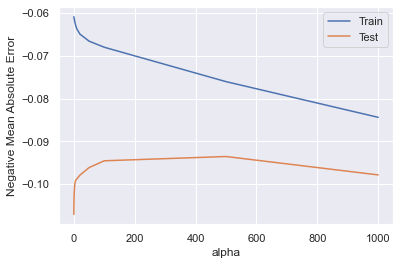

In [50]:
# Plot mean test and train scores against alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting

plt.plot(cv_results['param_alpha'] , cv_results['mean_train_score'],label='Train')
plt.plot(cv_results['param_alpha'] , cv_results['mean_test_score'],label='Test')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.legend(loc="upper right")
plt.show();

In [51]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.80204110e-03  1.60867087e-02 -1.00091250e-02 -1.90039422e-02
  5.49690469e-03  2.18780981e-02  1.46272023e-03  3.61843795e-03
  2.62537526e-02  2.97840906e-02  1.67267052e-02  0.00000000e+00
  2.94062251e-02  1.82819590e-02  1.10333112e-02  7.56313079e-03
  1.73333320e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.43488105e-04 -1.40308949e-02 -4.40479522e-03
  5.16973746e-04  1.71728737e-03  4.09478549e-03  7.02217487e-03
  6.36454181e-03 -9.21210013e-04 -1.78560217e-03 -2.42427753e-03
  1.19698197e-03 -7.46938771e-03  2.54978299e-04 -9.20072041e-04
  8.32298158e-03  3.34745363e-03  8.92371678e-03 -4.35477569e-03
  4.26466731e-03 -3.05867518e-03 -3.30119570e-03  7.17175255e-03
  2.14860343e-03  3.81877727e-03  5.59988041e-03 -2.84022605e-03
 -3.41211922e-03 -4.76965577e-03  2.50331573e-03  2.10306666e-03
  7.94408147e-04 -2.38075498e-03  4.97446823e-03  3.18598827e-03
 -3.30202972e-04  1.46671991e-02 -1.02084788e-02 -4.35454992e-03
 -1.29679563e-02 -1.09660

In [52]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9242225402984503
0.8914317711761939
12.323860057604723
7.460806399326359
0.012141734046901205
0.017111941282858624


#### Lasso Regression

In [53]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [55]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [56]:
lasso.coef_

array([ 4.56787183e-03,  1.94276642e-02, -2.76583880e-02, -2.18659054e-02,
       -7.30028972e-05,  2.42146584e-02,  0.00000000e+00,  5.98327712e-04,
        3.56203378e-02,  4.05865033e-02,  3.63285950e-02,  0.00000000e+00,
        4.26773937e-02,  2.79108026e-02,  1.19963395e-02,  6.38737551e-03,
        1.99995359e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.22499953e-02, -6.51233028e-03,
        0.00000000e+00,  2.82456196e-03,  0.00000000e+00,  9.86853955e-03,
        1.03439578e-02, -0.00000000e+00, -0.00000000e+00, -3.41563586e-03,
        0.00000000e+00, -1.12567635e-02,  2.21485860e-03,  0.00000000e+00,
        3.54400184e-02,  1.76952811e-02,  6.00143950e-02,  3.84942905e-02,
        4.48131674e-03, -0.00000000e+00, -0.00000000e+00,  6.16727027e-03,
        3.04200102e-03,  7.83209431e-03,  6.09451814e-03, -2.25228275e-03,
       -6.20328361e-03, -5.92381091e-03,  2.20721116e-03,  8.99417847e-04,
        6.60335653e-04, -

In [57]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9412085000121504
0.8839148921664862
9.561394922454895
7.977366166637328
0.009420093519659995
0.018296711391370016


In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.348967      0.049922         0.010138        0.002073    0.000100   
1       0.117771      0.018172         0.010008        0.003343    0.001000   
2       0.043963      0.005086         0.010225        0.001803    0.010000   
3       0.026304      0.003744         0.008647        0.001615    0.050000   
4       0.024626      0.004582         0.010146        0.001975    0.100000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.114780          -0.085625          -0.110001   
1   {'alpha': 0.001}          -0.102017          -0.085646          -0.095307   
2    {'alpha': 0.01}          -0.103901          -0.091523          -0.092455   
3    {'alpha': 0.05}          -0.152622          -0.136358          -0.126849   
4     {'alpha': 0.1}          -0.192437          -0.175043          -0.163846   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.101686          -0.092578        -0.100934        0.010758   
1          -0.088593          -0.092434        -0.092799        0.005661   
2          -0.088612          -0.102503        -0.095799        0.006192   
3          -0.125619          -0.144254        -0.137140        0.010291   
4          -0.160693          -0.175334        -0.173471        0.011150   

   rank_test_score  split0_train_score  split1_train_score  \
0                3           -0.057119           -0.064844   
1                1           -0.062218           -0.069081   
2                2           -0.082482           -0.088375   
3                4           -0.132991           -0.135045   
4                5           -0.169210           -0.172942   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.059141           -0.063754           -0.062627   
1           -0.064441           -0.068906           -0.067217   
2           -0.085315           -0.087246           -0.085522   
3           -0.135108           -0.137407           -0.134294   
4           -0.173687           -0.172473           -0.171825   

   mean_train_score  std_train_score  
0         -0.061497         0.002909  
1         -0.066372         0.002663  
2         -0.085788         0.002002  
3         -0.134969         0.001438  
4         -0.172027         0.001534

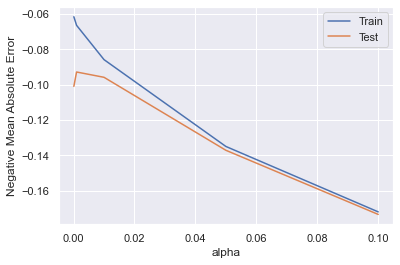

In [59]:
# Plot mean test and train scores against alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting

# We need not plot all the values otherwise the plot will not show the curve.
plt.plot(cv_results['param_alpha'][0:5],cv_results['mean_train_score'][0:5],label='Train')
plt.plot(cv_results['param_alpha'][0:5] , cv_results['mean_test_score'][0:5],label='Test')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.legend(loc="upper right")
plt.show();

### Model Evaluation<a id='modelEvaluation'></a>
Go to [Index](#index).

In [60]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric                      Linear Regression  Ridge Regression  \
0  R2 Score (Train)                               0.949648          0.924223   
1   R2 Score (Test)  -2,987,133,499,412,749,221,888.000000          0.891432   
2       RSS (Train)                               8.188823         12.323860   
3        RSS (Test) 205,275,751,198,162,327,437,312.000000          7.460806   
4       MSE (Train)                               0.089821          0.110190   
5        MSE (Test)                  21,698,293,553.066593          0.130813   

   Lasso Regression  
0          0.941209  
1          0.883915  
2          9.561395  
3          7.977366  
4          0.097057  
5          0.135265

#### As we can observe the overall performance of Ridge and Lasso regression is much better than Linear Regression. The RSS and MSE are quite consistent in Ridge and Lasso across train and test data. We also observe here that Ridge regresssion is rather robust model will lower residual sum of squares in test data compared to training data. 

In [61]:
# Lets check the beta coefficient values
# Create dataframe of the beta values with index as the original column names
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [62]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

#### Lets observe the beta values for each regresssion

In [63]:
betas.Linear.sort_values(ascending=False)

OverallCond_5            111,949,380,400.947189
OverallCond_6             85,323,224,430.669662
OverallCond_7             78,573,432,774.124634
OverallCond_8             48,987,824,911.466110
OverallCond_4             43,823,654,435.687424
BldgType_Duplex           33,452,952,779.592972
OverallCond_3             28,771,160,719.868698
OverallCond_9             27,565,586,072.309547
Exterior1st_CBlock        14,238,549,922.747322
PoolArea                  14,049,238,283.019222
OverallCond_2             13,219,314,174.627592
BsmtFinType1_None         13,163,223,225.393967
GarageQual_None            9,116,140,659.897449
GarageCond_None            9,116,140,567.258160
BedroomAbvGr_8             6,144,668,298.073546
Electrical_Mix             4,133,837,634.958648
ScreenPorch                3,324,264,014.256092
RoofMatl_Membran             210,616,198.285426
Exterior1st_AsphShn           42,207,854.825681
ExterCond_Po                  10,678,347.715969
MSZoning_RL                            0

In [64]:
betas.Ridge.sort_values(ascending=False)

1stFlrSF                 0.029784
GrLivArea                0.029406
TotalBsmtSF              0.026254
OverallQual_9            0.022721
BsmtFinSF1               0.021878
GarageArea               0.018282
OverallQual_8            0.017338
2ndFlrSF                 0.016727
HalfBath_1               0.016174
LotArea                  0.016087
Neighborhood_NridgHt     0.015481
Fireplaces_2             0.015394
CentralAir_Y             0.015167
Neighborhood_Crawfor     0.014667
TotRmsAbvGrd_10          0.013856
OverallCond_7            0.013368
Neighborhood_StoneBr     0.013219
GarageCars_3             0.013209
SaleCondition_Normal     0.012597
FullBath_3               0.012285
Exterior1st_BrkFace      0.011402
OverallCond_9            0.011171
WoodDeckSF               0.011033
Condition1_Norm          0.011009
Neighborhood_NoRidge     0.010325
OverallQual_10           0.010057
BsmtExposure_Gd          0.010034
BsmtFinType1_GLQ         0.009938
BsmtFullBath_1           0.009608
SaleType_New  

In [65]:
abs(betas.Lasso).sort_values(ascending=False)

MSZoning_RL             0.060014
RoofMatl_CompShg        0.059776
GrLivArea               0.042677
RoofMatl_Tar&Grv        0.041935
1stFlrSF                0.040587
MSZoning_RM             0.038494
RoofMatl_WdShngl        0.036476
2ndFlrSF                0.036329
OverallQual_9           0.035788
TotalBsmtSF             0.035620
MSZoning_FV             0.035440
SaleType_New            0.033445
SaleCondition_Normal    0.033121
OverallQual_8           0.032548
GarageArea              0.027911
YearBuilt               0.027658
RoofMatl_WdShake        0.025954
BsmtFinSF1              0.024215
OverallCond_3           0.022228
OverallQual_4           0.021886
YearRemodAdd            0.021866
Neighborhood_Crawfor    0.021147
KitchenQual_TA          0.020957
HalfBath_1              0.019821
OverallQual_3           0.019711
OverallQual_7           0.019533
GarageCars_1            0.019451
LotArea                 0.019428
OverallCond_7           0.018601
Condition1_Norm         0.018297
OverallCon

#### Observe the absolute value of Lasso beta values to find the top 5 predictors that we will need for later segment

### Steps for Question Answers segment II<a id='segment_2'></a>
Go to [Index](#index).

#### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### The optimal value of alpha for ridge regression is 500 and for Lasso Regression is 0.001

In [66]:
#Fitting Ridge model for alpha = 1000 doubling the hyperparameter and printing coefficients which have been penalised
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.61656632e-03  1.43389413e-02 -8.77749394e-03 -1.67774011e-02
  7.43214380e-03  1.93990079e-02  1.22854990e-03  3.48701181e-03
  2.29482771e-02  2.58422562e-02  1.40149279e-02  0.00000000e+00
  2.61678694e-02  1.65388182e-02  9.98335972e-03  7.38468739e-03
 -4.94210921e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.56716165e-04 -1.28651307e-02 -2.95509230e-03
  3.93227938e-05  8.53305000e-04  5.36508680e-03  5.65365895e-03
  5.13615391e-03 -7.17174826e-04 -1.54503495e-03 -2.44512722e-03
  1.00988151e-03 -6.41460462e-03 -1.32977757e-03 -7.99884036e-04
  6.11819725e-03  1.98422585e-03  7.70597460e-03 -5.97395077e-03
  4.19206588e-03 -2.93200062e-03 -4.57156658e-03  6.14031496e-03
  1.97381765e-03  1.47971128e-03  5.14999519e-03 -2.09497911e-03
 -1.67850114e-03 -3.87630638e-03  2.25506350e-03  1.97278458e-03
  6.08539628e-04 -2.63854584e-03  3.32817999e-03  3.07140012e-03
 -5.63264830e-04  1.18429547e-02 -8.48674341e-03 -3.97435275e-03
 -1.07986058e-02 -9.44466

In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9096788959533785
0.8868594779218331
14.689125907662962
7.775014295515712
0.014472045229224594
0.017832601595219523


In [68]:
#Fitting Lasso model for alpha = 0.002 and printing coefficients which have been penalised

alpha =0.002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [69]:
lasso.coef_

array([ 0.00000000e+00,  2.04327676e-02, -2.12792759e-02, -2.54420607e-02,
       -0.00000000e+00,  2.48971500e-02, -0.00000000e+00,  0.00000000e+00,
        3.68559221e-02,  3.95231594e-02,  3.55709616e-02,  0.00000000e+00,
        4.52643580e-02,  2.70981480e-02,  1.12750226e-02,  4.77517480e-03,
        9.95985221e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.40551373e-02, -4.31746168e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.36991831e-03,
        7.81566597e-03,  0.00000000e+00, -0.00000000e+00, -2.46013441e-03,
        0.00000000e+00, -1.02617419e-02,  0.00000000e+00,  0.00000000e+00,
        9.62542021e-03,  3.93909981e-03,  1.23188612e-02,  0.00000000e+00,
        4.59183931e-03, -1.82622553e-03, -0.00000000e+00,  4.62881131e-03,
        1.75975679e-04,  2.19412753e-03,  5.39245011e-03, -1.66618263e-04,
       -4.18128661e-03, -3.92737770e-03,  0.00000000e+00,  5.00988897e-04,
        0.00000000e+00, -

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9329377922719729
0.8931290792864951
10.906478871807872
7.344167421716112
0.0107452993810915
0.01684442069200943


In [71]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric                      Linear Regression  Ridge Regression  \
0  R2 Score (Train)                               0.949648          0.909679   
1   R2 Score (Test)  -2,987,133,499,412,749,221,888.000000          0.886859   
2       RSS (Train)                               8.188823         14.689126   
3        RSS (Test) 205,275,751,198,162,327,437,312.000000          7.775014   
4       MSE (Train)                               0.089821          0.120300   
5        MSE (Test)                  21,698,293,553.066593          0.133539   

   Lasso Regression  
0          0.932938  
1          0.893129  
2         10.906479  
3          7.344167  
4          0.103660  
5          0.129786

In [72]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [73]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [74]:
abs(betas.Ridge.sort_values(ascending=False))

GrLivArea               0.026168
1stFlrSF                0.025842
TotalBsmtSF             0.022948
BsmtFinSF1              0.019399
OverallQual_9           0.018701
GarageArea              0.016539
OverallQual_8           0.014513
LotArea                 0.014339
Fireplaces_2            0.014058
2ndFlrSF                0.014015
Neighborhood_NridgHt    0.013599
GarageCars_3            0.013545
HalfBath_1              0.013508
CentralAir_Y            0.013325
Neighborhood_Crawfor    0.011843
TotRmsAbvGrd_10         0.011793
FullBath_3              0.011325
Neighborhood_StoneBr    0.010682
BsmtFinType1_GLQ        0.010285
OverallQual_10          0.010043
WoodDeckSF              0.009983
OverallCond_7           0.009730
BsmtExposure_Gd         0.009693
Exterior1st_BrkFace     0.009434
Neighborhood_NoRidge    0.009286
FireplaceQu_Gd          0.009001
OverallCond_9           0.008991
BsmtFullBath_1          0.008956
FullBath_2              0.008951
Condition1_Norm         0.008501
MSZoning_R

In [75]:
abs(betas.Lasso).sort_values(ascending=False)

GrLivArea               0.045264
1stFlrSF                0.039523
TotalBsmtSF             0.036856
OverallQual_9           0.036384
2ndFlrSF                0.035571
OverallQual_8           0.032619
SaleType_New            0.028788
SaleCondition_Normal    0.028208
GarageArea              0.027098
YearRemodAdd            0.025442
BsmtFinSF1              0.024897
OverallQual_4           0.023333
HalfBath_1              0.022511
OverallCond_3           0.022130
YearBuilt               0.021279
LotArea                 0.020433
Neighborhood_Crawfor    0.020326
OverallQual_7           0.019331
Neighborhood_NridgHt    0.018823
OverallQual_3           0.018798
OverallQual_2           0.018777
OverallCond_4           0.018175
Condition1_Norm         0.017357
CentralAir_Y            0.017029
OverallCond_7           0.016913
FullBath_1              0.016731
GarageCars_1            0.015914
OverallQual_5           0.015578
Neighborhood_Somerst    0.015564
Neighborhood_StoneBr    0.015373
Fireplaces

#### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

-- For Model simplification, I would choose Lasso model as some of the coefficients become 0, it results in easier model selection and hence easier interpretation, particularly when the number of coefficents are very large.
-- Although from the datapoints in the compartive study table shows that the ridge regression model has lower residual sum of squares for the test data compared to the train data. That shows the robust nature of Ridge regression
-- In the current case it would be best to go for Lasso Regression

#### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [80]:
# Removing top 5 most important predictor variables from X_train and X_test
# Since there are 10 values of OverallQual, we need to remove them all the options to remove the entire variable
X_train=X_train.drop(['GrLivArea','1stFlrSF','TotalBsmtSF','OverallQual_2','OverallQual_3','OverallQual_4','OverallQual_5','OverallQual_6','OverallQual_7','OverallQual_8','OverallQual_9','OverallQual_10','2ndFlrSF'],axis=1)
X_test=X_test.drop(['GrLivArea','1stFlrSF','TotalBsmtSF','OverallQual_2','OverallQual_3','OverallQual_4','OverallQual_5','OverallQual_6','OverallQual_7','OverallQual_8','OverallQual_9','OverallQual_10','2ndFlrSF'],axis=1)

In [ ]:
# We need to fit the model again with the new X_train and predict for the new X_test

In [81]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


#### Observe that alpha has not changed

In [83]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [84]:
lasso.coef_

array([ 3.80775283e-03,  3.11925509e-02, -2.38586627e-02, -2.42742865e-02,
        5.51682631e-03,  4.72467834e-02,  1.00695747e-02,  3.60876382e-02,
        0.00000000e+00,  3.86486149e-02,  1.26111527e-02,  8.56455277e-03,
        3.49828007e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.22299991e-02, -5.98412343e-03,
        0.00000000e+00,  6.48647428e-03,  0.00000000e+00,  1.21213945e-02,
        9.43607084e-03, -1.26661806e-03, -2.88239679e-04, -9.56974716e-04,
        1.71473820e-03, -1.46178348e-02,  0.00000000e+00,  0.00000000e+00,
        5.04395414e-02,  2.81147196e-02,  8.49752091e-02,  7.11529870e-02,
        2.27122195e-03,  0.00000000e+00,  0.00000000e+00,  1.09244644e-02,
        1.70032817e-03,  7.52736833e-03,  7.67060799e-03, -7.76474711e-03,
       -7.97675898e-03, -7.99776546e-03,  0.00000000e+00,  2.70915277e-03,
       -0.00000000e+00, -1.24208297e-03,  9.87003874e-03,  0.00000000e+00,
        2.75658458e-03,  

In [85]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9246879315490661
0.8593286938232525
12.24817242348222
9.666929199225759
0.012067164949243567
0.02217185596152697


In [87]:
betaNew = pd.DataFrame(index=X_train.columns)
betaNew.rows = X_train.columns

In [89]:
betaNew['Lasso'] = lasso.coef_

In [90]:
abs(betaNew.Lasso).sort_values(ascending=False)

MSZoning_RL             0.084975
MSZoning_RM             0.071153
RoofMatl_CompShg        0.068185
MSZoning_FV             0.050440
RoofMatl_Tar&Grv        0.047443
BsmtFinSF1              0.047247
KitchenQual_TA          0.046799
RoofMatl_WdShngl        0.045361
GarageArea              0.038649
KitchenQual_Gd          0.037483
BsmtUnfSF               0.036088
LotArea                 0.031193
BsmtQual_TA             0.030917
RoofMatl_WdShake        0.030894
HalfBath_1              0.030736
SaleCondition_Normal    0.029454
OverallCond_3           0.029411
MSZoning_RH             0.028115
Neighborhood_StoneBr    0.027672
TotRmsAbvGrd_5          0.026278
Neighborhood_NridgHt    0.026277
CentralAir_Y            0.025916
TotRmsAbvGrd_10         0.024545
YearRemodAdd            0.024274
YearBuilt               0.023859
FireplaceQu_None        0.023276
SaleType_New            0.022856
FullBath_1              0.022658
Neighborhood_Crawfor    0.022606
MSSubClass_30           0.022230
OverallCon

#### As we can see now, the top 5 predictors are : MSZoning, RoofMatl, BsmtFinSF1, KitchenQual and GarageArea

#### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

A model is considered robust and generalisable if its output dependent variable performs consistently well on train and test data even if one or more of the input independent variables or features are changed. In real life scenario, it is always the case that the test data will be unseen and unpredictable. The accuracy of the model is measured by metrics like R-squared value, mean-squared error and Residual sum of squares.